# mixMC 
1. Is there a difference in microbiome profile in benign (controls) vs malignant (cases) pancreatobiliary conditions?
2. Genus level

In [4]:
source("metagenomics_fns.R")
library("mixOmics")
library("tidyverse")
library("ggpubr")
library("reshape2")

In [5]:
load("bile_ps_nodup_noenv_2160otu.phyloseq")

In [6]:
ls()

[1] "mg.adonis"                       "mg.adonis_good_variables"       
 [3] "mg.bf_ratio"                     "mg.calculate_rarefaction_curves"
 [5] "mg.change_taxa_rank_names"       "mg.find_otu"                    
 [7] "mg.group_significance_filter"    "mg.multiple_testing"            
 [9] "mg.plot_abundance"               "mg.plot_prev_vs_totalbund"      
[11] "mg.prepare_for_topics"           "mg.prune_taxa"                  
[13] "mg.reformat_obs_md"              "mg.save_map"                    
[15] "mg.save_otu"                     "mg.save_taxa"                   
[17] "mg.save_tree"                    "mg.table_denovo_and_gg"         
[19] "mg.taxa_proportion"              "ps1"

In [7]:
ps0 = ps1
ps0

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2160 taxa and 46 samples ]
sample_data() Sample Data:       [ 46 samples by 36 sample variables ]
tax_table()   Taxonomy Table:    [ 2160 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2160 tips and 2101 internal nodes ]

In [8]:
# summarize_phyloseq(ps0)

In [9]:
# Genus

In [10]:
ps0_g = tax_glom(ps0, taxrank = "Genus", NArm=TRUE, bad_empty=c(NA, "", " ", "\t"))

In [11]:
ps0_g

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 307 taxa and 46 samples ]
sample_data() Sample Data:       [ 46 samples by 36 sample variables ]
tax_table()   Taxonomy Table:    [ 307 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 307 tips and 306 internal nodes ]

In [12]:
ps0_g = prune_taxa(taxa_sums(ps0_g)>1, ps0_g)
ps0_g = prune_samples(sample_sums(ps0_g)>1, ps0_g)
ps0_g

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 307 taxa and 46 samples ]
sample_data() Sample Data:       [ 46 samples by 36 sample variables ]
tax_table()   Taxonomy Table:    [ 307 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 307 tips and 306 internal nodes ]

In [13]:
otu_table(ps0_g) %>% head

bile12 bile13 bile14 bile15L bile16 bile17
76672d4d8a231eda68421067c54a0e5a   0      0    0      0       0       7    
b0422f7cce6c12900b73251c703bda99   0      9    0      0       0       0    
5364d2e40d303545fd75797af2c833b7   2      0    0      0       0       0    
d811f8dc5623fda159105cc98adc47df   0      0    0      0       0       0    
de5ca9cd912db2a4c21e146287db30ab 854    679    4      3       0      10    
d4d6030b0bf125db50c8a4a34282175c   0      0    0      0       0       0    
                                 bile18 bile19 bile20 bile21 ⋯ bileAM bileB
76672d4d8a231eda68421067c54a0e5a   0    0       0       0    ⋯ 0      0    
b0422f7cce6c12900b73251c703bda99   0    0       0       0    ⋯ 0      0    
5364d2e40d303545fd75797af2c833b7 118    0       0       0    ⋯ 0      0    
d811f8dc5623fda159105cc98adc47df   0    0       0       0    ⋯ 0      0    
de5ca9cd912db2a4c21e146287db30ab   0    0      85     125    ⋯ 0      0    
d4d6030b0bf125db50c8a4a34282175c   0    0       4       0    ⋯ 0      0    
                                 bileC bileDM bileE bileFM bileG bileH bileIL
76672d4d8a231eda68421067c54a0e5a 0     0       0    0        0     0     0   
b0422f7cce6c12900b73251c703bda99 0     0       0    0        0     0     0   
5364d2e40d303545fd75797af2c833b7 0     0       0    0        0     0     0   
d811f8dc5623fda159105cc98adc47df 0     0       0    0        0     0     0   
de5ca9cd912db2a4c21e146287db30ab 0     0      95    0      142     0   113   
d4d6030b0bf125db50c8a4a34282175c 0     0       0    0        0   417     0   
                                 bileJM
76672d4d8a231eda68421067c54a0e5a 0     
b0422f7cce6c12900b73251c703bda99 0     
5364d2e40d303545fd75797af2c833b7 0     
d811f8dc5623fda159105cc98adc47df 0     
de5ca9cd912db2a4c21e146287db30ab 0     
d4d6030b0bf125db50c8a4a34282175c 0

In [14]:
fct_count(get_variable(ps0_g, "treatment"))

f       n 
1 Case    32
2 Control 14

In [15]:
otu = as.matrix(t(otu_table(ps0_g)))

In [16]:
otu %>% dim

[1]  46 307

In [17]:
otu = otu + 1

In [18]:
sum(which(otu == 0))

[1] 0

In [19]:
otu %>% head(3)

76672d4d8a231eda68421067c54a0e5a b0422f7cce6c12900b73251c703bda99
bile12 1                                 1                              
bile13 1                                10                              
bile14 1                                 1                              
       5364d2e40d303545fd75797af2c833b7 d811f8dc5623fda159105cc98adc47df
bile12 3                                1                               
bile13 1                                1                               
bile14 1                                1                               
       de5ca9cd912db2a4c21e146287db30ab d4d6030b0bf125db50c8a4a34282175c
bile12 855                              1                               
bile13 680                              1                               
bile14   5                              1                               
       74f6f652694032fcc16300f4867b824a a20494e5b195ca6bc12bd7b9d143540b
bile12  74                               121                            
bile13 390                              3412                            
bile14   6                                75                            
       51032d1c9b7eb61f0e951e172375130a 034d89ebcf17ed7042a78d557ad4f97a ⋯
bile12 1                                 108                             ⋯
bile13 5                                1960                             ⋯
bile14 1                                  45                             ⋯
       70771f216b7ff2d022f89271bc1b0e6f 5b82723e4105865ebe8b273123b61ba9
bile12 1                                1                               
bile13 1                                1                               
bile14 1                                1                               
       a84a41a115e5a50693df684aecc370a6 4f74224deea6c178983651a4b6d75497
bile12    1                             1                               
bile13 1602                             1                               
bile14   20                             1                               
       d7d775c37da625dd35f82ea762b67b4d 03e6b6aefa7688a7ccf4cdd026e67cb2
bile12 14                                1                              
bile13 61                                1                              
bile14  1                               32                              
       8cd84021a83d4e32609854682c1a6845 06d8478d117c776d41540f3b4e7e2567
bile12 1                                1                               
bile13 1                                1                               
bile14 1                                1                               
       90bf2aa4c048c10e2d97ccd1aa129865 f7c88dcef1caf90f14be823297aedee1
bile12 1                                1                               
bile13 1                                1                               
bile14 1                                1

In [20]:
# prefiltering
low.count.removal = function(
                        data, # OTU count data frame of size n (sample) x p (OTU)
                        percent=0.01 # cutoff chosen
                        ){
    keep.otu = which(colSums(data)*100/(sum(colSums(data))) > percent)
    data.filter = data[,keep.otu]
    return(list(data.filter = data.filter, keep.otu = keep.otu))
}

# each variable read count is divided by the total number of read counts
TSS.divide = function(x){
 x/sum(x)
}

In [21]:
result.filter = low.count.removal(otu, percent=0.05)
data.filter = result.filter$data.filter
length(result.filter$keep.otu) # check the number of variables kept after filtering

[1] 97

In [22]:
data.TSS = t(apply(data.filter, 1, TSS.divide))

In [23]:
data.TSS %>% dim

[1] 46 97

In [24]:
data.TSS %>% head

de5ca9cd912db2a4c21e146287db30ab 74f6f652694032fcc16300f4867b824a
bile12  2.016747e-02                     1.745489e-03                    
bile13  2.956393e-02                     1.695578e-02                    
bile14  1.636983e-04                     1.964379e-04                    
bile15L 9.619778e-05                     2.640629e-02                    
bile16  1.247318e-05                     1.247318e-05                    
bile17  1.181525e-03                     8.592911e-04                    
        a20494e5b195ca6bc12bd7b9d143540b 034d89ebcf17ed7042a78d557ad4f97a
bile12  2.854110e-03                     2.547470e-03                    
bile13  1.483414e-01                     8.521369e-02                    
bile14  2.455474e-03                     1.473284e-03                    
bile15L 6.017171e-02                     3.439071e-03                    
bile16  1.247318e-05                     1.247318e-05                    
bile17  4.940924e-03                     1.288937e-03                    
        28294f064e559989cb5df6e4cd1c6652 a9fc3effb41a192b17018d01d43544bd
bile12  2.358769e-05                     1.651138e-04                    
bile13  4.347637e-05                     4.347637e-05                    
bile14  3.273965e-05                     3.273965e-05                    
bile15L 2.404945e-05                     1.442967e-04                    
bile16  1.247318e-05                     1.247318e-05                    
bile17  1.074114e-04                     5.370569e-03                    
        060fa769be38523fd4e5978f03ee9d7e 324e5d5e1a7f2e529a85b6bfc35803d9
bile12  2.358769e-05                     2.358769e-05                    
bile13  4.347637e-05                     4.347637e-05                    
bile14  2.651912e-03                     3.273965e-05                    
bile15L 2.404945e-05                     2.885933e-04                    
bile16  1.247318e-05                     1.247318e-05                    
bile17  1.074114e-04                     1.074114e-04                    
        6e61bb80b1f1bfe0d3cdfac8dab282a5 21a5929e864bfb83ab5e8fbd8bf51245 ⋯
bile12  1.179384e-04                     2.358769e-05                     ⋯
bile13  4.347637e-05                     7.217078e-03                     ⋯
bile14  3.273965e-05                     1.309586e-04                     ⋯
bile15L 2.404945e-05                     2.404945e-05                     ⋯
bile16  1.247318e-05                     1.247318e-05                     ⋯
bile17  1.074114e-04                     1.074114e-04                     ⋯
        dc29c828856cbcf644198a90aec47265 9f41a60a84ff1e20f5a765165ae0f05a
bile12  2.358769e-05                     2.358769e-05                    
bile13  2.439024e-02                     4.347637e-05                    
bile14  3.601362e-04                     3.273965e-05                    
bile15L 9.379284e-04                     2.404945e-05                    
bile16  1.247318e-05                     1.247318e-05                    
bile17  1.074114e-04                     2.320086e-02                    
        a75892dee301b33c533b8233d9e29108 905df2631f9541a2b48b12686168097b
bile12  2.358769e-05                     2.358769e-05                    
bile13  4.347637e-05                     4.347637e-05                    
bile14  3.273965e-05                     3.273965e-05                    
bile15L 2.404945e-05                     2.404945e-05                    
bile16  1.247318e-05                     1.247318e-05                    
bile17  2.363050e-02                     1.074114e-04                    
        b08e961b9618c77a3d1fd1087dfdb251 a84a41a115e5a50693df684aecc370a6
bile12  2.358769e-05                     2.358769e-05                    
bile13  4.347637e-05                     6.964915e-02                    
bile14  3.273965e-05                     6.547931e-04                    
bile15L 2.404945e-05                     1.996104e-02                   

In [25]:
colnames(data.TSS) %>% head

[1] "de5ca9cd912db2a4c21e146287db30ab" "74f6f652694032fcc16300f4867b824a"
[3] "a20494e5b195ca6bc12bd7b9d143540b" "034d89ebcf17ed7042a78d557ad4f97a"
[5] "28294f064e559989cb5df6e4cd1c6652" "a9fc3effb41a192b17018d01d43544bd"

In [26]:
mg.find_otu = function (ps, otu_name) 
{
    res = tax_table(ps)[as.character(otu_name)]
    return(as.character(res))
}



In [27]:
genus_names = as.character(sapply(colnames(data.TSS), function(x){ as.character(mg.find_otu(ps = ps0, x)[6]) }))

In [28]:
colnames_data = colnames(data.TSS)
nnames = list()
for(i in c(1: ncol(data.TSS))){
    if(genus_names[i] == "D_5__NA"){
        n = paste0("OTU",i,"_",genus_names[i])
        nnames[i] = n
    }else{
        n = paste0("OTU",i,"_",gsub('D_5__','', genus_names[i]))
        nnames[i] = n
    }
}

In [29]:
dfx = cbind(colnames_data,genus_names,nnames)

In [30]:
colnames(data.TSS) = nnames

In [31]:
data.TSS %>% head

OTU1_Campylobacter OTU2_Alloprevotella OTU3_Prevotella 7
bile12  2.016747e-02       1.745489e-03        2.854110e-03     
bile13  2.956393e-02       1.695578e-02        1.483414e-01     
bile14  1.636983e-04       1.964379e-04        2.455474e-03     
bile15L 9.619778e-05       2.640629e-02        6.017171e-02     
bile16  1.247318e-05       1.247318e-05        1.247318e-05     
bile17  1.181525e-03       8.592911e-04        4.940924e-03     
        OTU4_Prevotella OTU5_Prevotella 2 OTU6_Bacteroides OTU7_Alistipes
bile12  2.547470e-03    2.358769e-05      1.651138e-04     2.358769e-05  
bile13  8.521369e-02    4.347637e-05      4.347637e-05     4.347637e-05  
bile14  1.473284e-03    3.273965e-05      3.273965e-05     2.651912e-03  
bile15L 3.439071e-03    2.404945e-05      1.442967e-04     2.404945e-05  
bile16  1.247318e-05    1.247318e-05      1.247318e-05     1.247318e-05  
bile17  1.288937e-03    1.074114e-04      5.370569e-03     1.074114e-04  
        OTU8_Capnocytophaga OTU9_Bergeyella OTU10_Tannerella ⋯
bile12  2.358769e-05        1.179384e-04    2.358769e-05     ⋯
bile13  4.347637e-05        4.347637e-05    7.217078e-03     ⋯
bile14  3.273965e-05        3.273965e-05    1.309586e-04     ⋯
bile15L 2.885933e-04        2.404945e-05    2.404945e-05     ⋯
bile16  1.247318e-05        1.247318e-05    1.247318e-05     ⋯
bile17  1.074114e-04        1.074114e-04    1.074114e-04     ⋯
        OTU88_Shuttleworthia OTU89_Coprococcus 3 OTU90_uncultured
bile12  2.358769e-05         2.358769e-05        2.358769e-05    
bile13  2.439024e-02         4.347637e-05        4.347637e-05    
bile14  3.601362e-04         3.273965e-05        3.273965e-05    
bile15L 9.379284e-04         2.404945e-05        2.404945e-05    
bile16  1.247318e-05         1.247318e-05        1.247318e-05    
bile17  1.074114e-04         2.320086e-02        2.363050e-02    
        OTU91_[Ruminococcus] gauvreauii group
bile12  2.358769e-05                         
bile13  4.347637e-05                         
bile14  3.273965e-05                         
bile15L 2.404945e-05                         
bile16  1.247318e-05                         
bile17  1.074114e-04                         
        OTU92_[Ruminococcus] torques group OTU93_Oribacterium
bile12  2.358769e-05                       2.358769e-05      
bile13  4.347637e-05                       6.964915e-02      
bile14  3.273965e-05                       6.547931e-04      
bile15L 2.404945e-05                       1.996104e-02      
bile16  4.240882e-04                       1.247318e-05      
bile17  1.074114e-04                       1.074114e-04      
        OTU94_Lachnoanaerobaculum OTU95_Stomatobaculum OTU96_Lachnoclostridium
bile12  3.302276e-04              2.358769e-05         2.358769e-05           
bile13  2.652059e-03              4.347637e-05         4.347637e-05           
bile14  3.273965e-05              1.047669e-03         3.273965e-05           
bile15L 2.404945e-05              2.525192e-03         2.404945e-05           
bile16  1.247318e-05              1.247318e-05         1.247318e-05           
bile17  1.074114e-04              1.074114e-04         1.074114e-04           
        OTU97_Blautia
bile12  2.358769e-05 
bile13  4.347637e-05 
bile14  3.273965e-05 
bile15L 6.974339e-04 
bile16  1.247318e-05 
bile17  1.600430e-02

# CLR transformation

In [32]:
# library(propr)

In [33]:
Y  =  sample_data(ps0)$treatment
summary(Y)

Case Control 
     32      14

In [34]:
nlevels(Y)

[1] 2

In [35]:
# ?plsda

In [36]:
d.plsda = plsda(X = data.TSS, Y, ncomp = nlevels(Y), logratio = 'CLR')
d.perf.plsda = perf(d.plsda, validation = 'Mfold', folds = 10, progressBar = F, nrepeat = 10, auc = T)

In [37]:
d.perf.plsda


Call:
 perf.mixo_plsda(object = d.plsda, validation = "Mfold", folds = 10, nrepeat = 10, auc = T, progressBar = F) 

 Main numerical outputs: 
 -------------------- 
 Error rate (overall or BER) for each component and for each distance: see object$error.rate 
 Error rate per class, for each component and for each distance: see object$error.rate.class 
 Prediction values for each component: see object$predict 
 Classification of each sample, for each component and for each distance: see object$class 
 AUC values: see object$auc if auc = TRUE 

 Visualisation Functions: 
 -------------------- 
 plot 

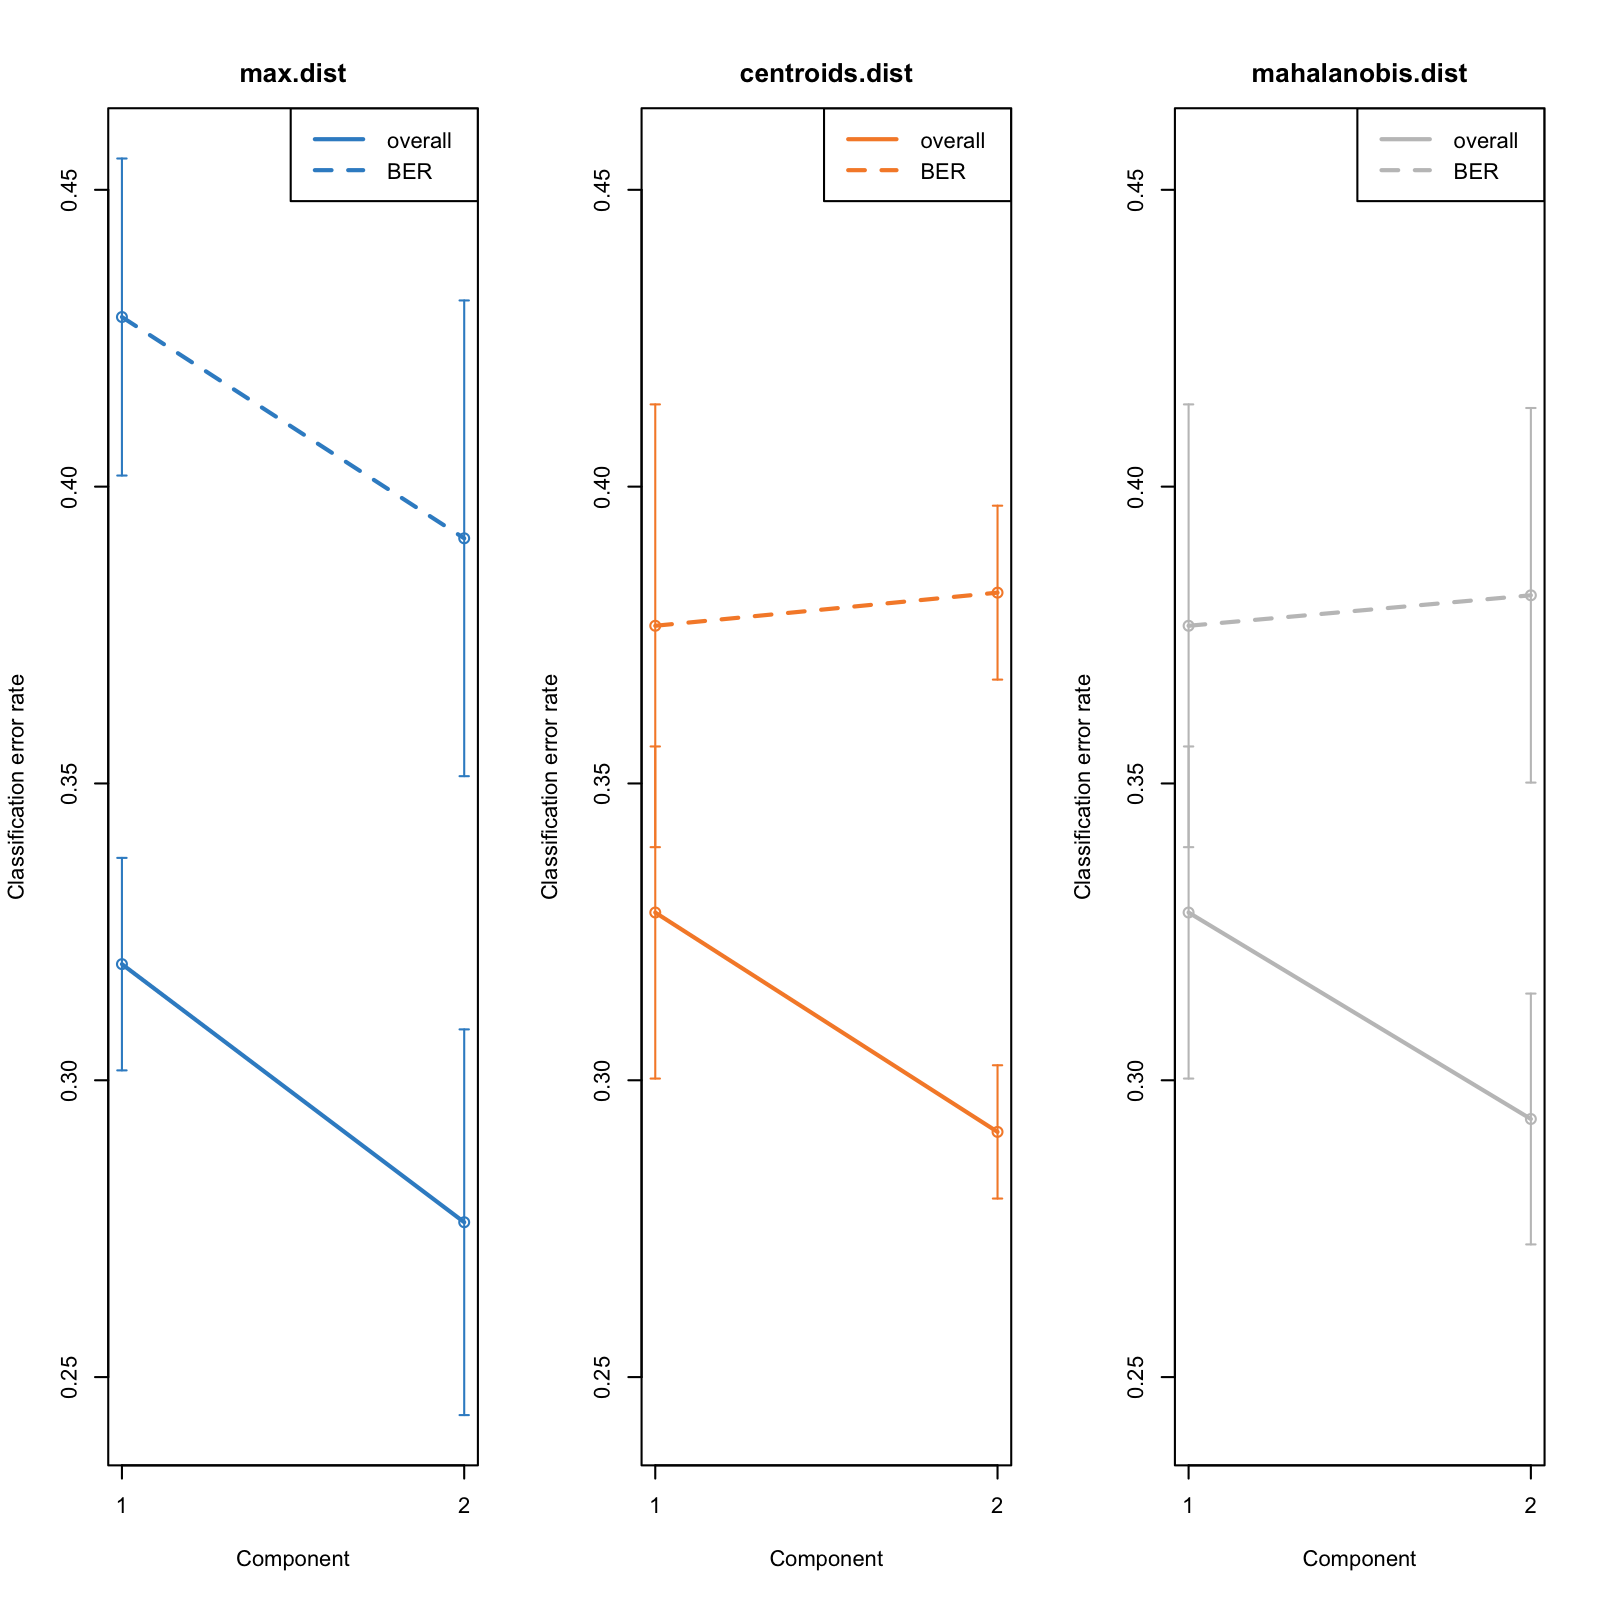

In [38]:
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res=200)
plot(d.perf.plsda, overlay= 'measure', sd=T)

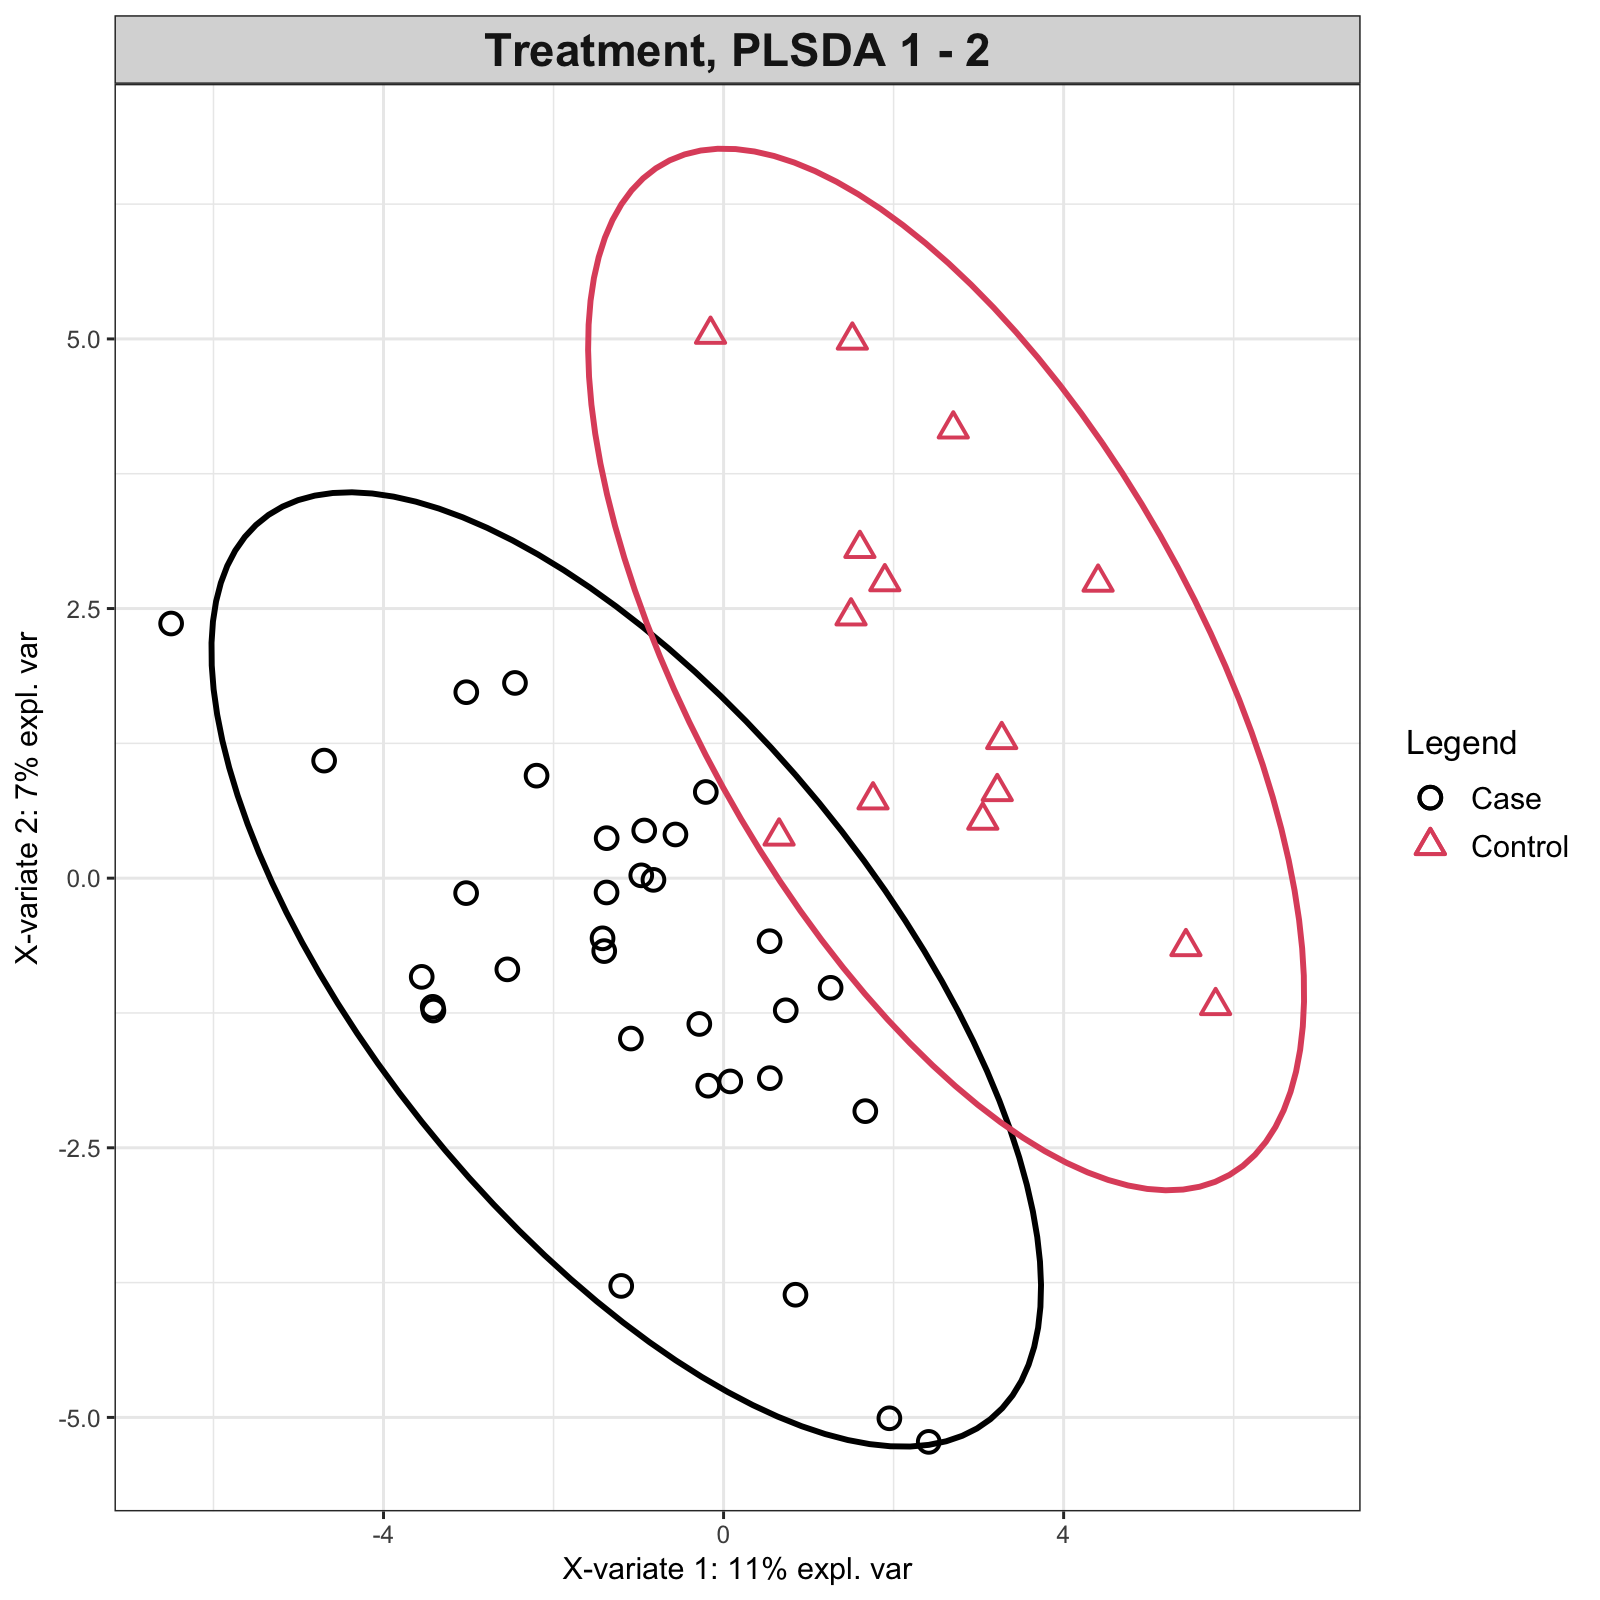

In [39]:
#First two components
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res=200)
plotIndiv(d.plsda , comp = c(1,2),col=c(1:2),
          group = Y, ind.names = FALSE, 
          ellipse = TRUE, legend = TRUE, title = 'Treatment, PLSDA 1 - 2')

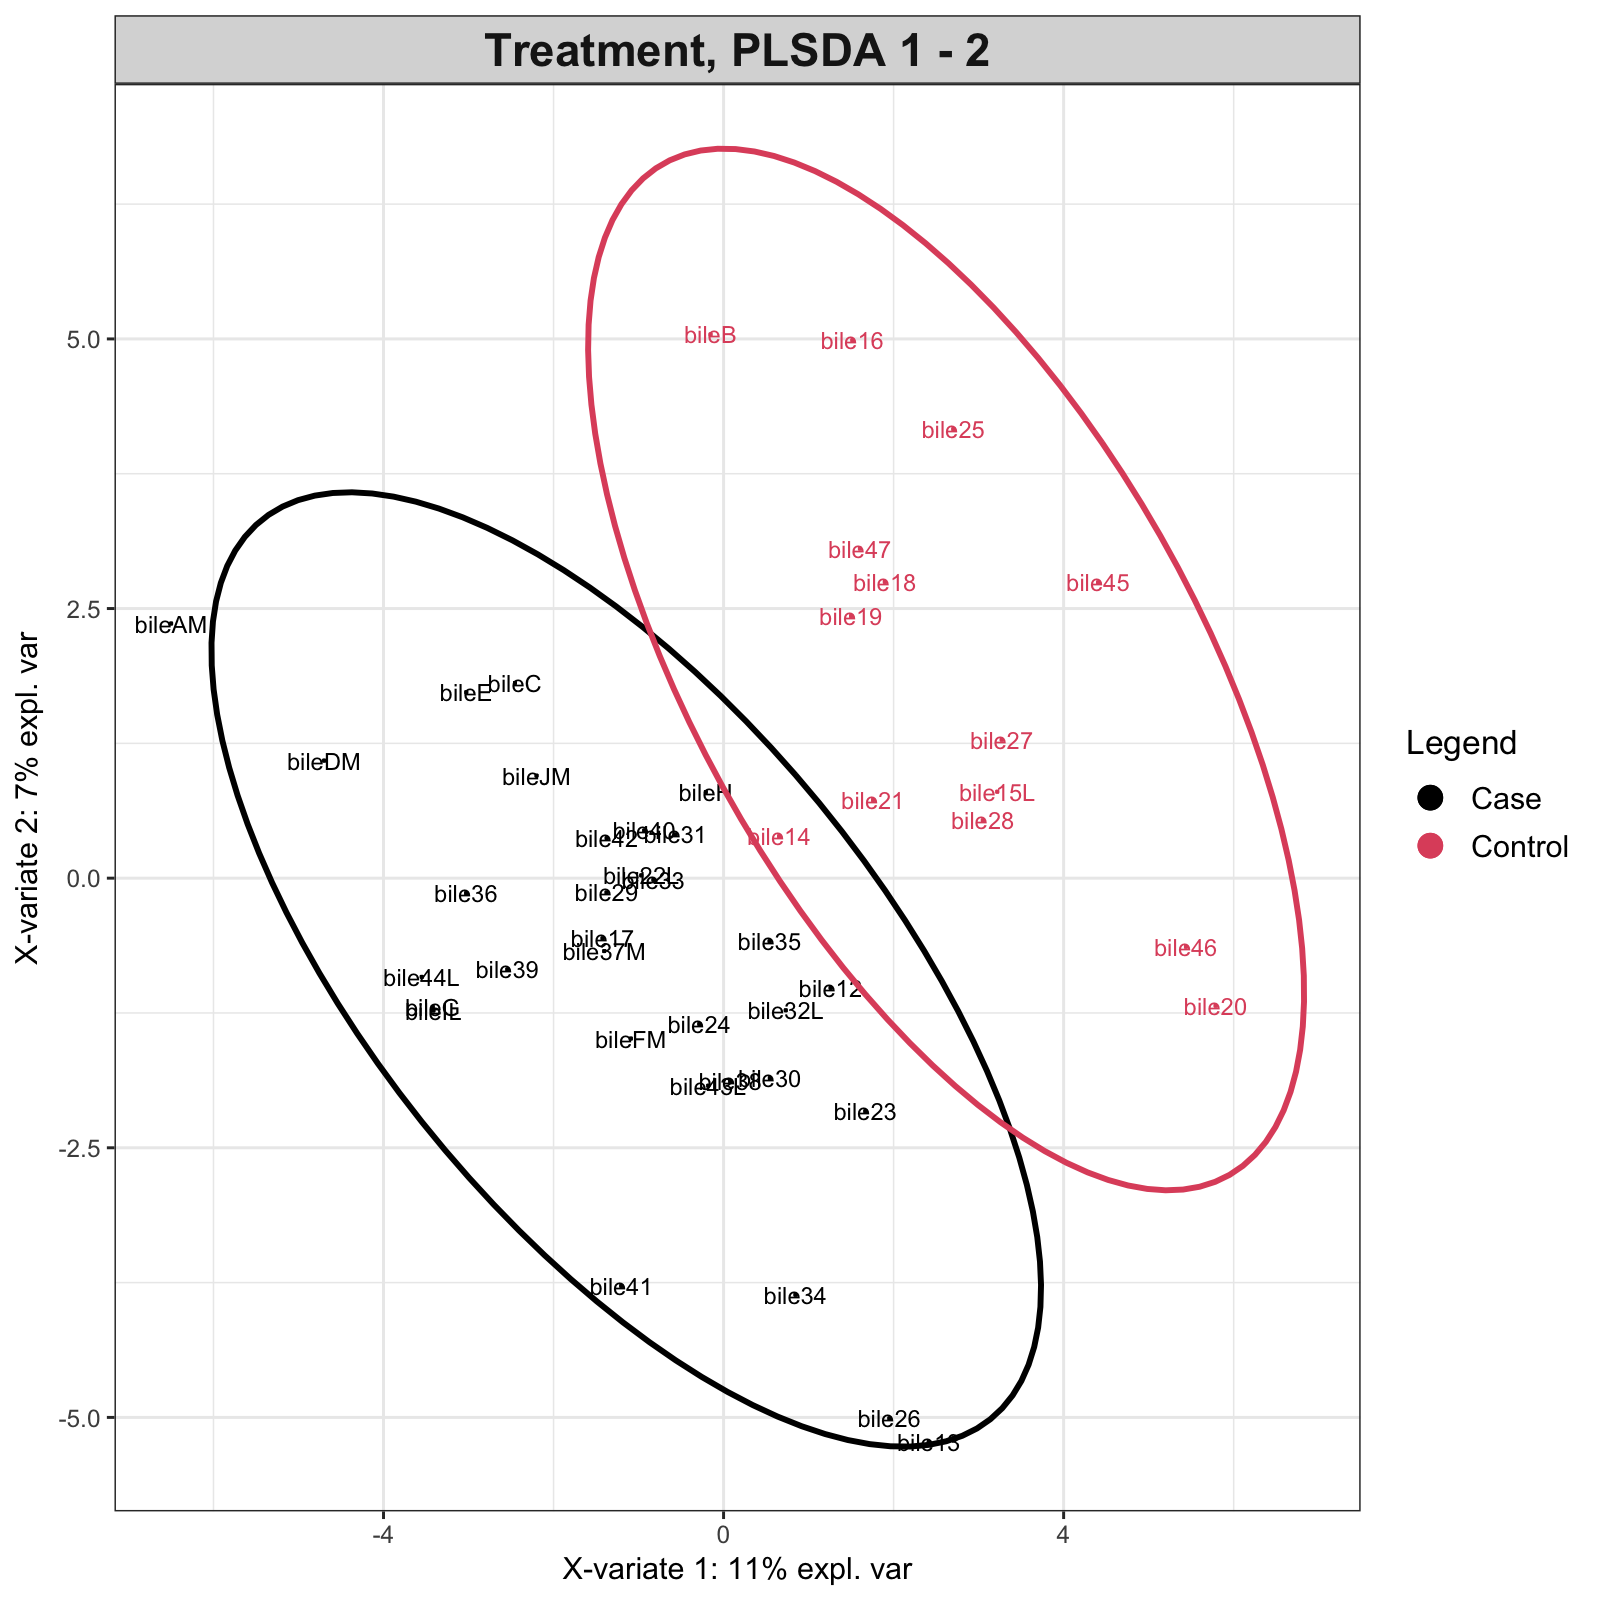

In [40]:
#First two components

options(repr.plot.width=8, repr.plot.height=8, repr.plot.res=200)
plotIndiv(d.plsda , comp = c(1,2),col=c(1:2),
          group = Y, ind.names = T, 
          ellipse = TRUE, legend = TRUE, title = 'Treatment, PLSDA 1 - 2')

In [41]:
set.seed(33)  # for reproducible results for this code
d.tune.splsda = tune.splsda(data.TSS, 
                          Y = Y, 
                          ncomp = 2, 
                          multilevel = NULL, 
                          logratio = 'CLR',
                          test.keepX = c(seq(10,300, 5)), 
                          validation = c('Mfold'), 
                          folds = 10, 
                          dist = 'max.dist', # prediction distance can be chosen according to tune.plsda results
                          nrepeat = 10,
                          progressBar = T)


comp 1 
  |======================================================================| 100%
comp 2 
  |======================================================================| 100%


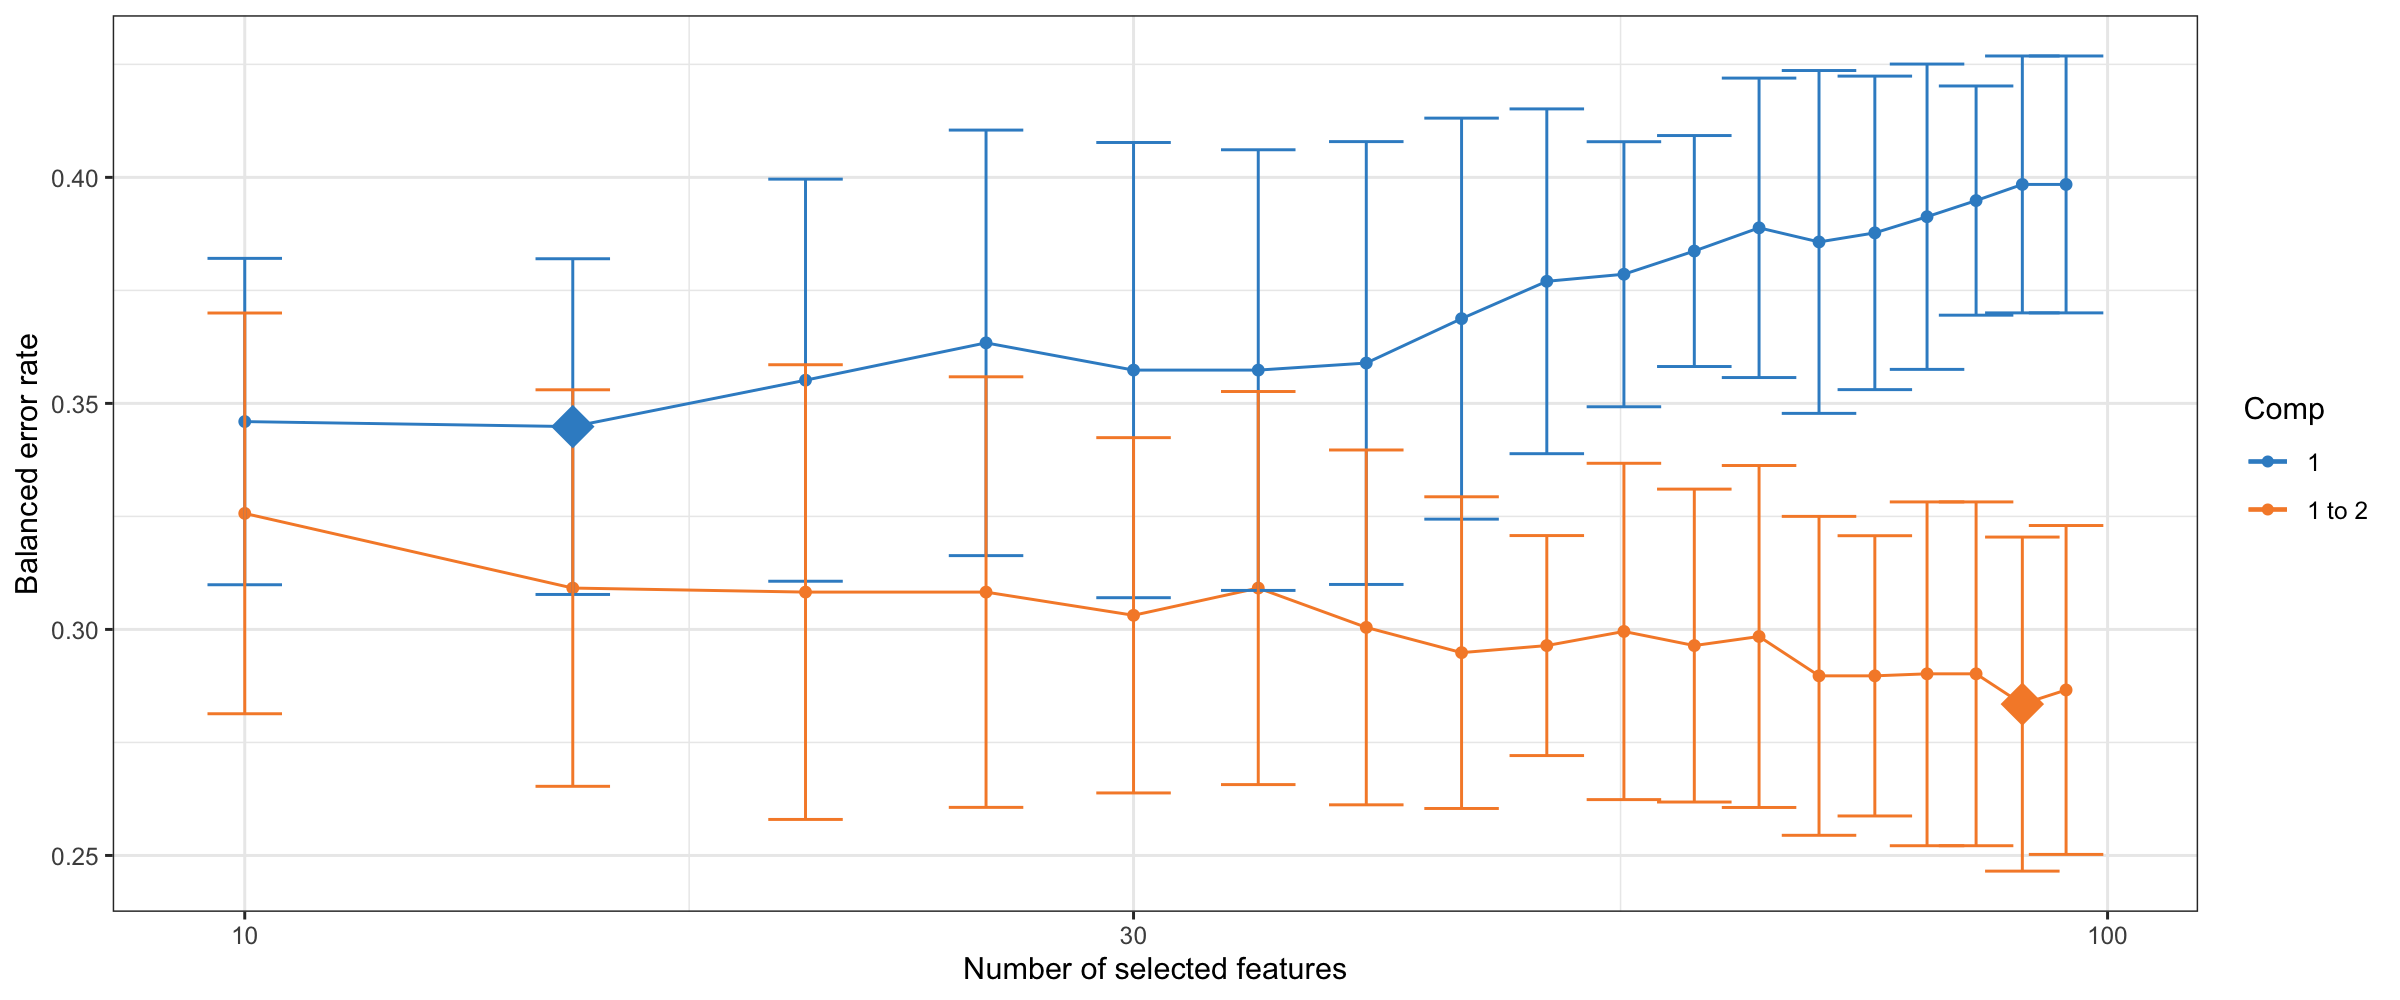

In [42]:
options(repr.plot.width=12, repr.plot.height=5)
plot(d.tune.splsda)

In [43]:
# optimal number of variables to select on 2 comps:
select.keepX = d.tune.splsda$choice.keepX[1:2]
select.keepX

comp1 comp2 
   15    90

In [44]:
data.splsda = splsda(X = data.TSS,  Y = Y, ncomp = 2, keepX = select.keepX, logratio= "CLR")

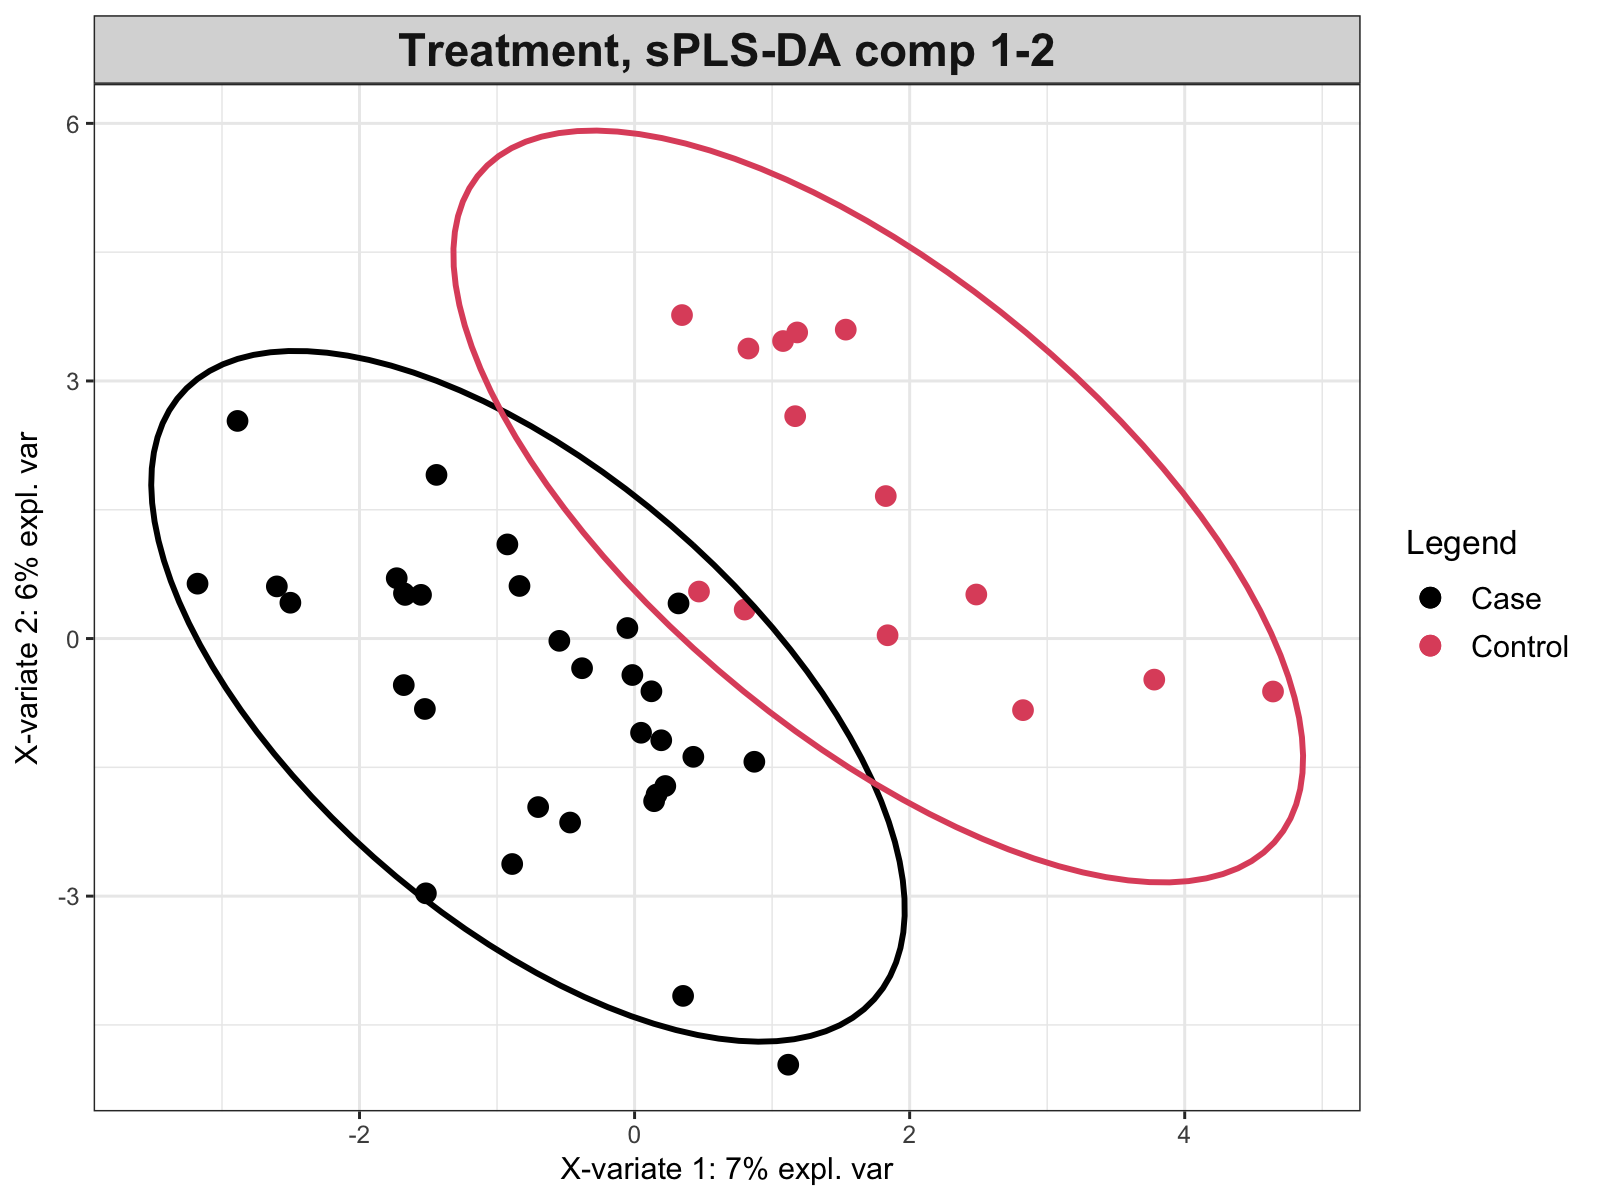

In [45]:
options(repr.plot.width=8, repr.plot.height=6)
plotIndiv(data.splsda, 
          ind.names = F, 
#           col.per.group = color.mixo(1:2),  # c("red","black"), 
          col=c(1:2),
          comp = c(1,2),
          pch = 16, 
          ellipse = TRUE,
          legend = TRUE,
          title = 'Treatment, sPLS-DA comp 1-2')

In [109]:
pdf("splsda_comp1_2_Cancer_vs_nonCancer_02.pdf")
options(repr.plot.width=8, repr.plot.height=6)
plotIndiv(data.splsda, 
          ind.names = F, 
#           col.per.group = color.mixo(1:2),  # c("red","black"), 
          col=c(1:2),
          comp = c(1,2),
          pch = 16, 
          ellipse = TRUE,
          legend = TRUE,
          title = 'Treatment, sPLS-DA comp 1-2')
dev.off()

pdf 
  2

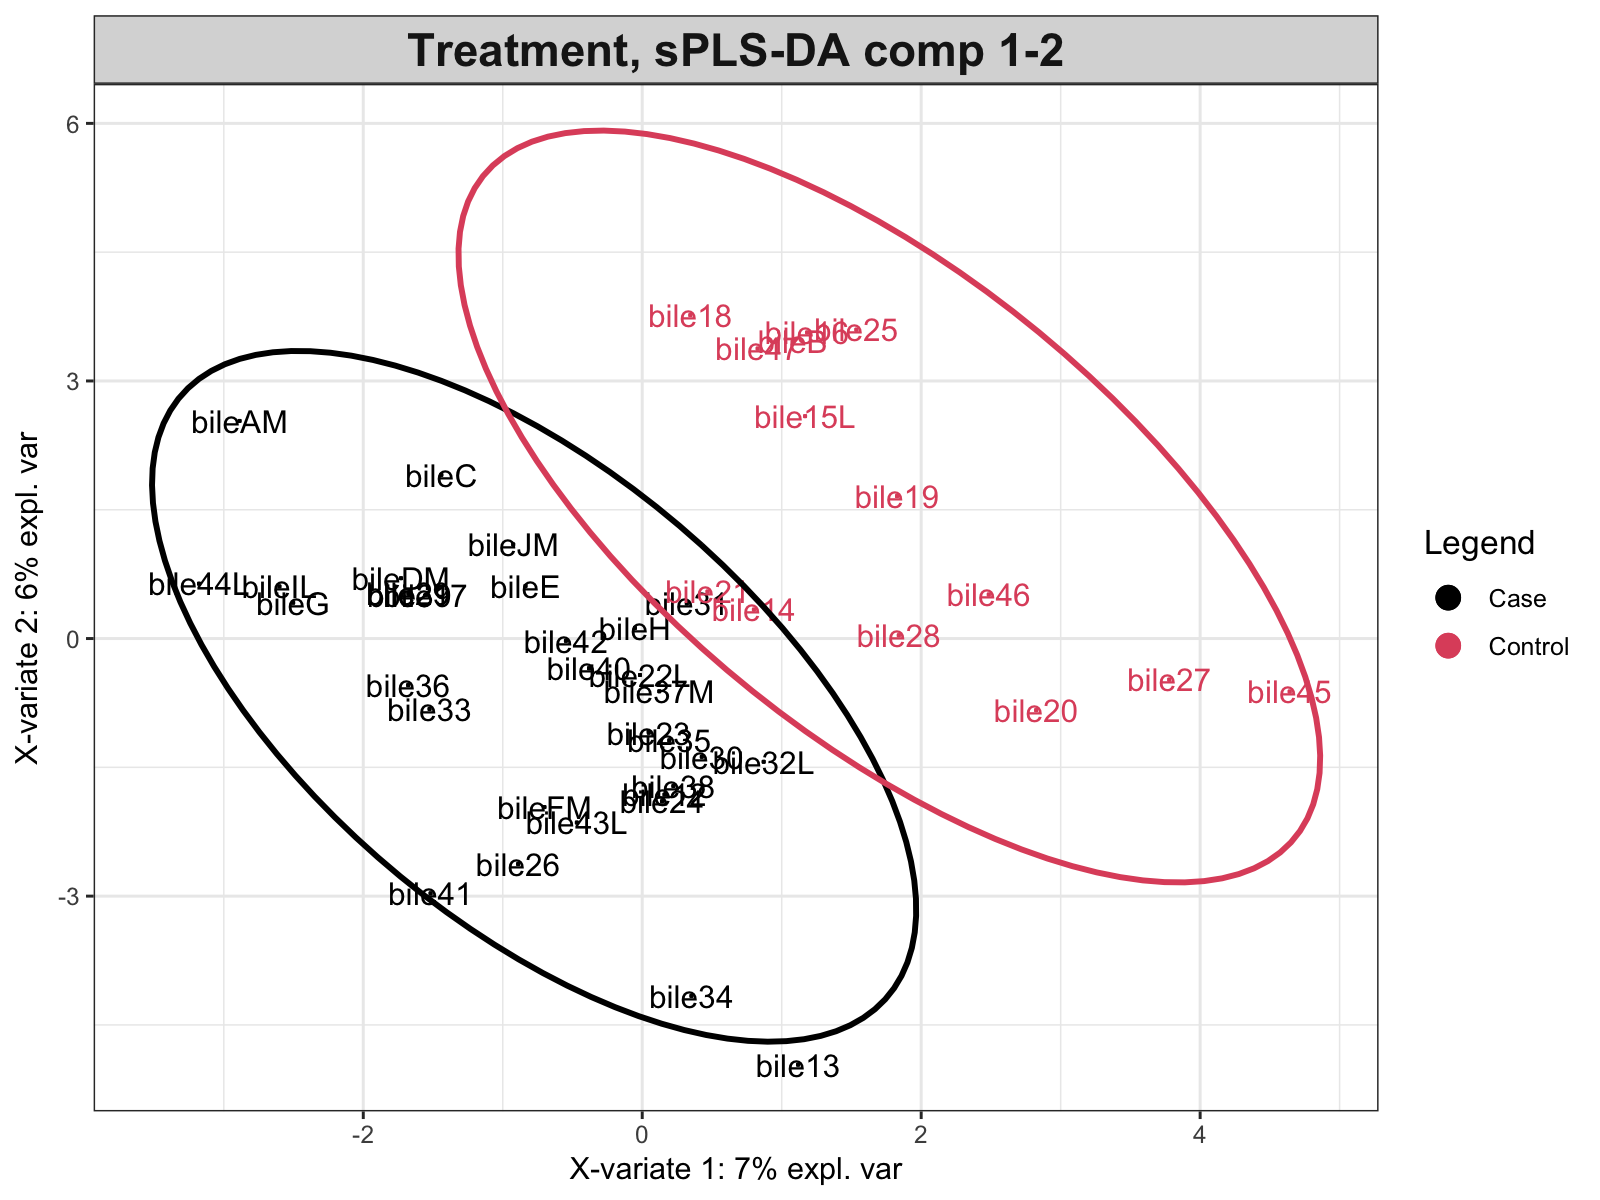

In [71]:
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res =200)
plotIndiv(data.splsda, size.legend = 9,cex = 4,
          ind.names = T, 
          #col.per.group = color.mixo(1:2), #  c("red","black")
          comp = c(1,2), col=c(1:2),
          # pch = 16, 
          ellipse = TRUE,
          legend = TRUE,
          title = 'Treatment, sPLS-DA comp 1-2')

In [108]:
pdf("splsda_comp1_2_Cancer_vs_nonCancer_01.pdf")
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res =200)
plotIndiv(data.splsda, size.legend = 9,cex = 4,
          ind.names = T, 
          #col.per.group = color.mixo(1:2), #  c("red","black")
          comp = c(1,2), col=c(1:2),
          # pch = 16, 
          ellipse = TRUE,
          legend = TRUE,
          title = 'Treatment, sPLS-DA comp 1-2')
dev.off()

pdf 
  2

In [47]:
set.seed(34)  # for reproducible results for this code

data.perf.splsda = perf(data.splsda, validation = 'Mfold', folds = 10, progressBar = T, nrepeat = 10, dist = 'max.dist')


comp 1 
  |======================================================================| 100%
comp 2 
  |======================================================================| 100%


In [48]:
data.perf.splsda$error.rate 

$overall
       max.dist
comp1 0.2413043
comp2 0.2086957

$BER
       max.dist
comp1 0.3522321
comp2 0.2886161

In [49]:
head(selectVar(data.splsda, comp = 2)$value) 

value.var 
OTU14_Sphingomonas      0.2749482
OTU52_Peptococcus      -0.2482413
OTU9_Bergeyella        -0.2127539
OTU64_Facklamia        -0.2104152
OTU81_Lachnospira       0.1883948
OTU77_Faecalibacterium  0.1877425

In [50]:
selected.OTU.comp2 = selectVar(data.splsda, comp = 2)$name
# stability of OTUs selected on comp 2
data.perf.splsda$features$stable[[2]][selected.OTU.comp2]


                   OTU14_Sphingomonas                     OTU52_Peptococcus 
                                 1.00                                  1.00 
                      OTU9_Bergeyella                       OTU64_Facklamia 
                                 1.00                                  1.00 
                    OTU81_Lachnospira                OTU77_Faecalibacterium 
                                 1.00                                  1.00 
                   OTU87_Agathobacter                      OTU51_Parvimonas 
                                 1.00                                  1.00 
                  OTU55_Lactobacillus                         OTU86_D_5__NA 
                                 1.00                                  1.00 
                  OTU57_Solobacterium                         OTU32_D_5__NA 
                                 1.00                                  1.00 
                  OTU43_Fusobacterium                  OTU59_Anaerobacillus

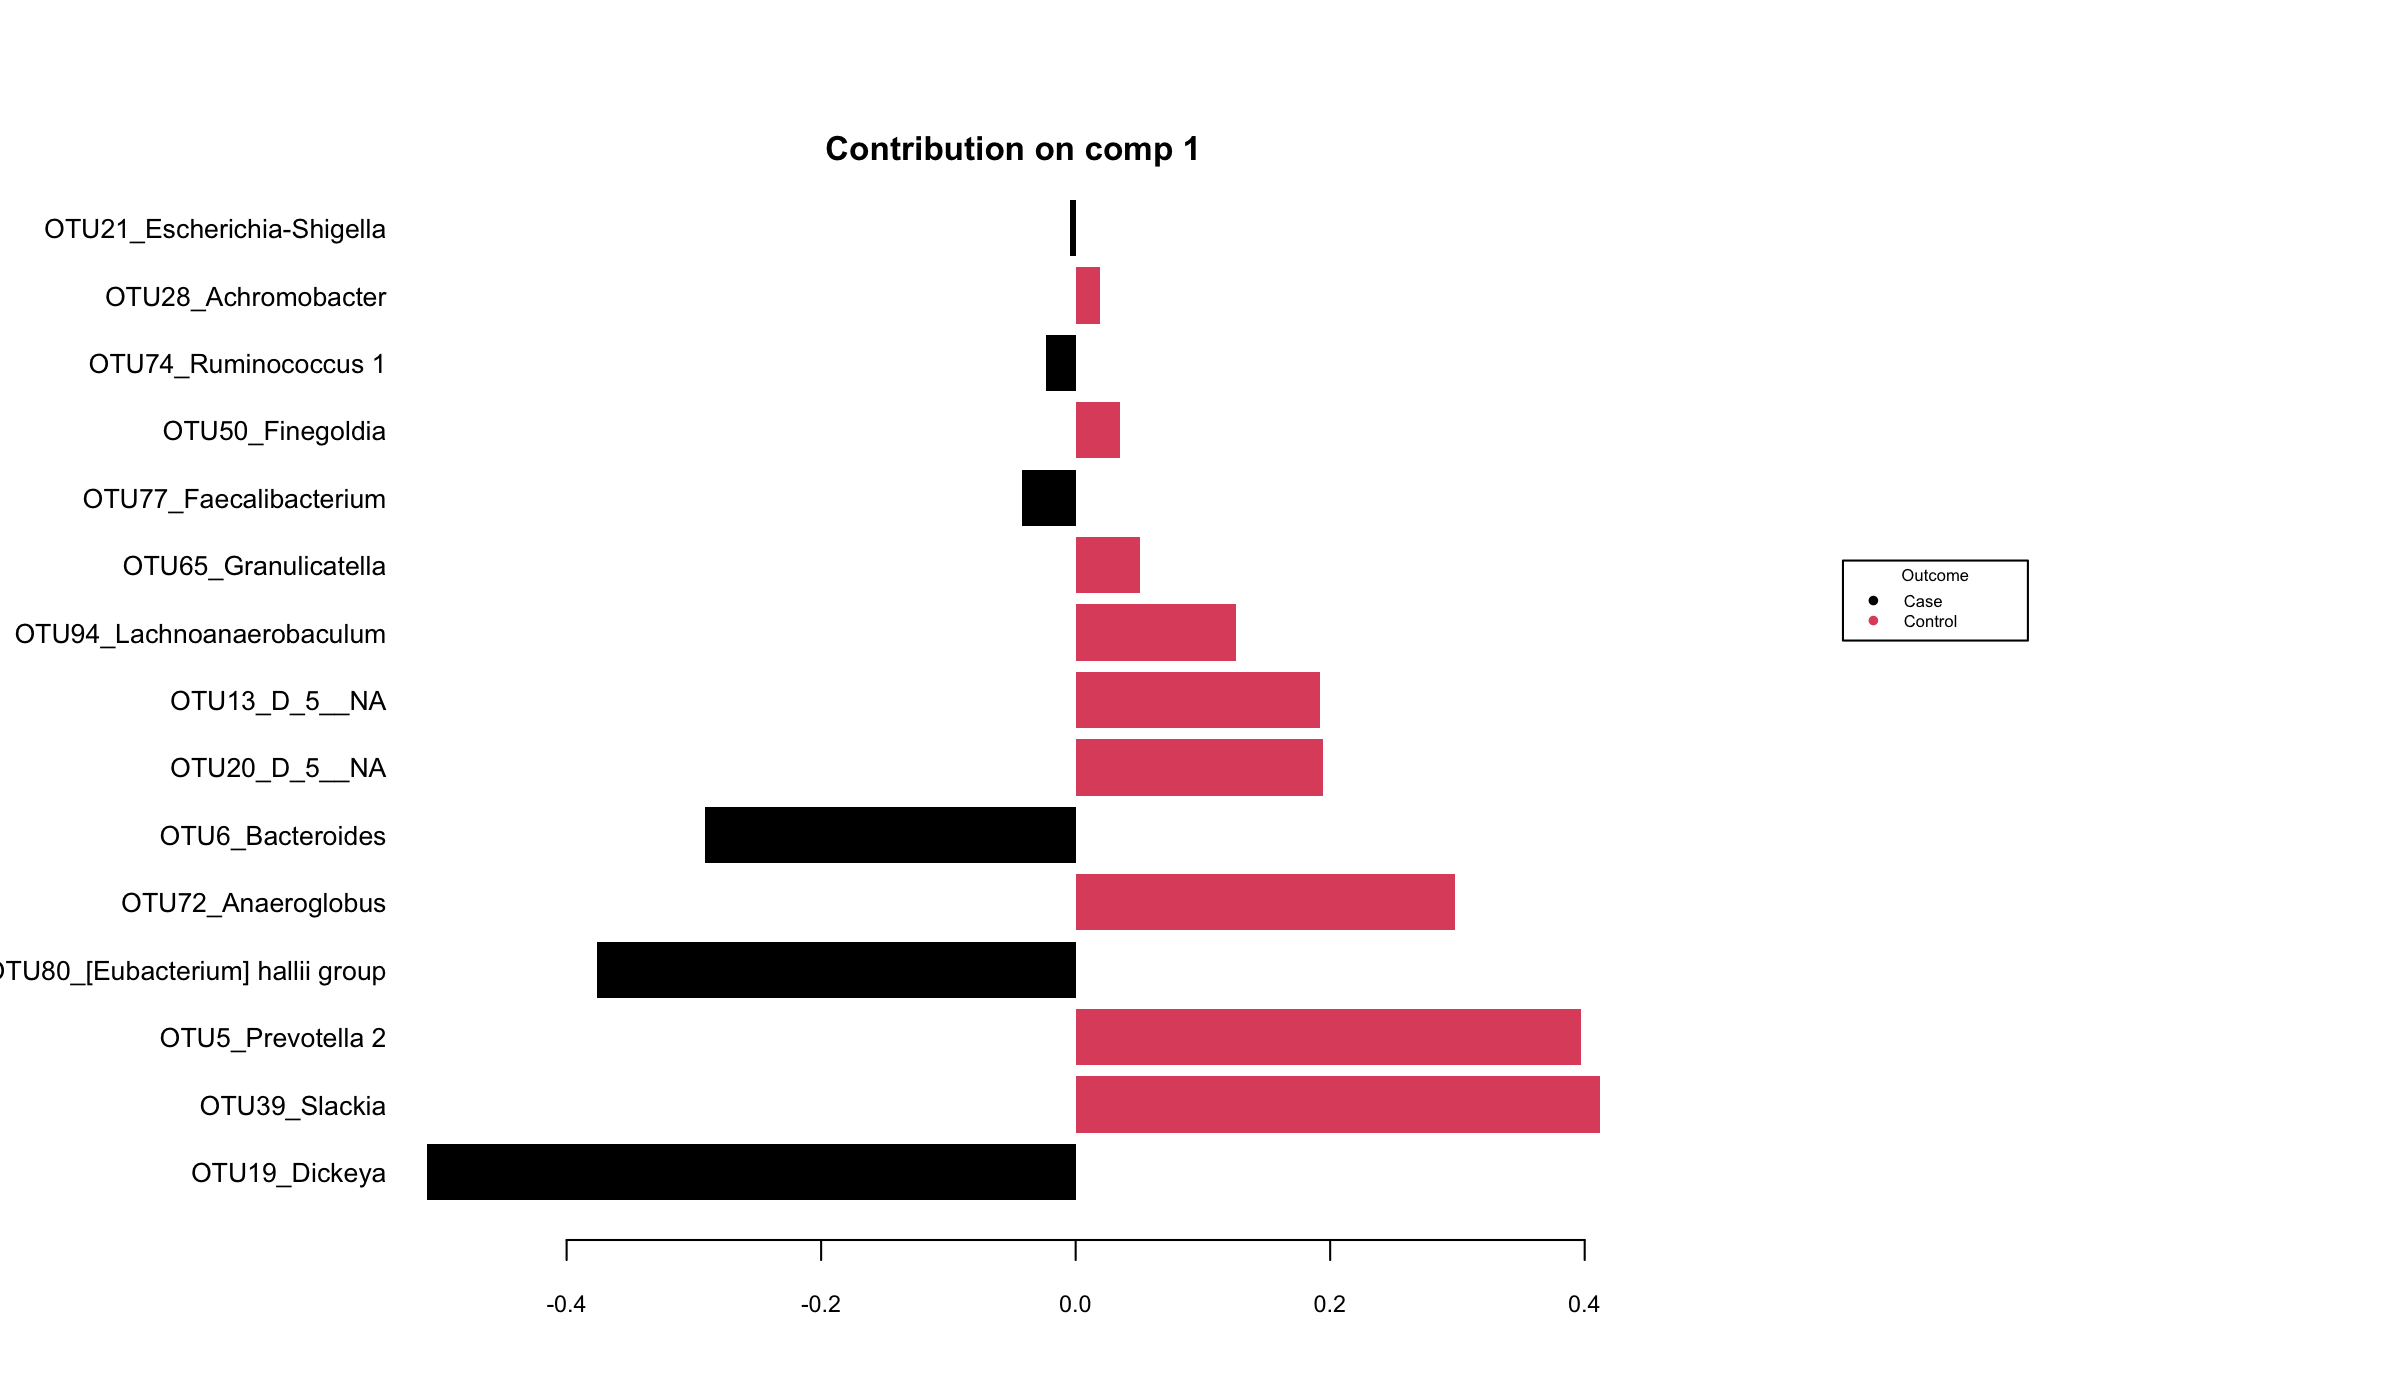

In [88]:
options(repr.plot.width = 12, repr.plot.height =7 ,repr.plot.res = 200)
plotLoadings(data.splsda, comp = 1, method = 'mean',contrib = 'max', size.title = 1, 
              size.name = .8, size.legend = 0.5, legend.color=c(1:2), margin=c(20,20)) # col.ties = c("red","black")

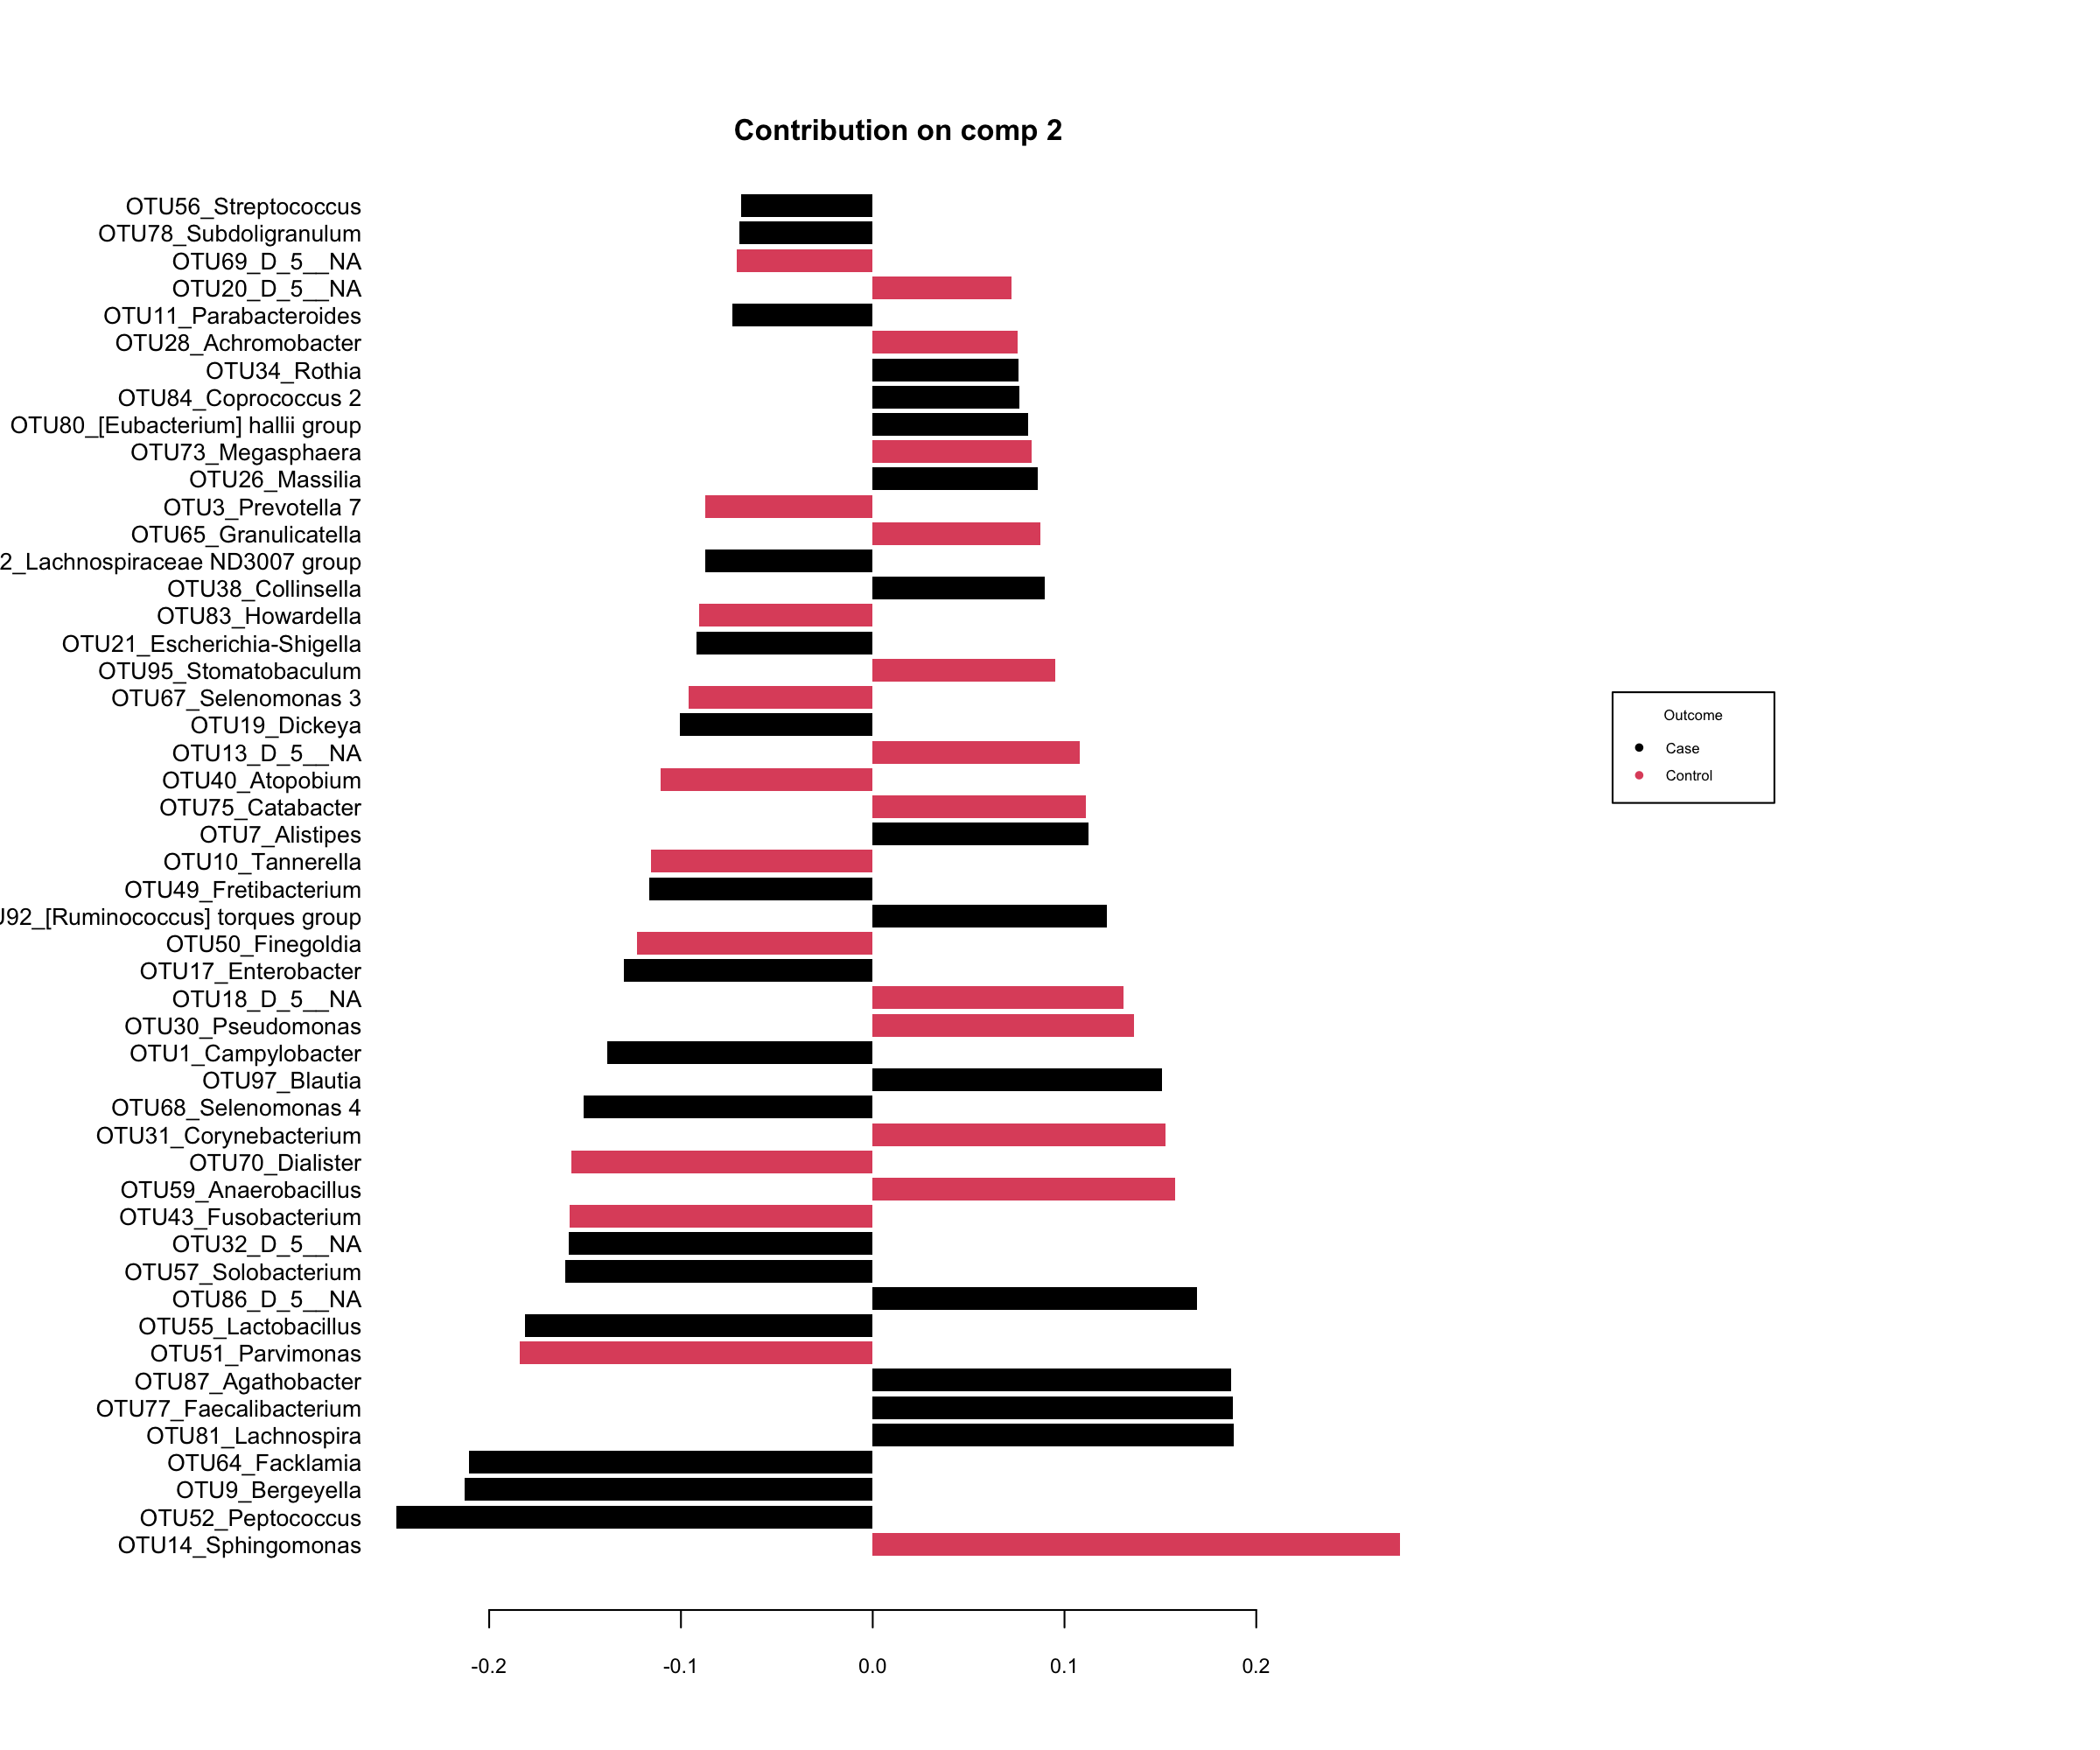

In [93]:
options(repr.plot.width = 12, repr.plot.height =10 ,repr.plot.res = 200)
plotLoadings(data.splsda, comp = 2, method = 'mean', contrib = 'max', size.title = 1, ndisplay = 50, size.name = .8, size.legend = 0.5, margin=c(50,50), legend.color=c(1:2))

In [53]:
# data.splsda$loadings$X[,c("comp1","comp2")] %>% as.data.frame %>% ggplot(aes(comp1, comp2)) + geom_point()

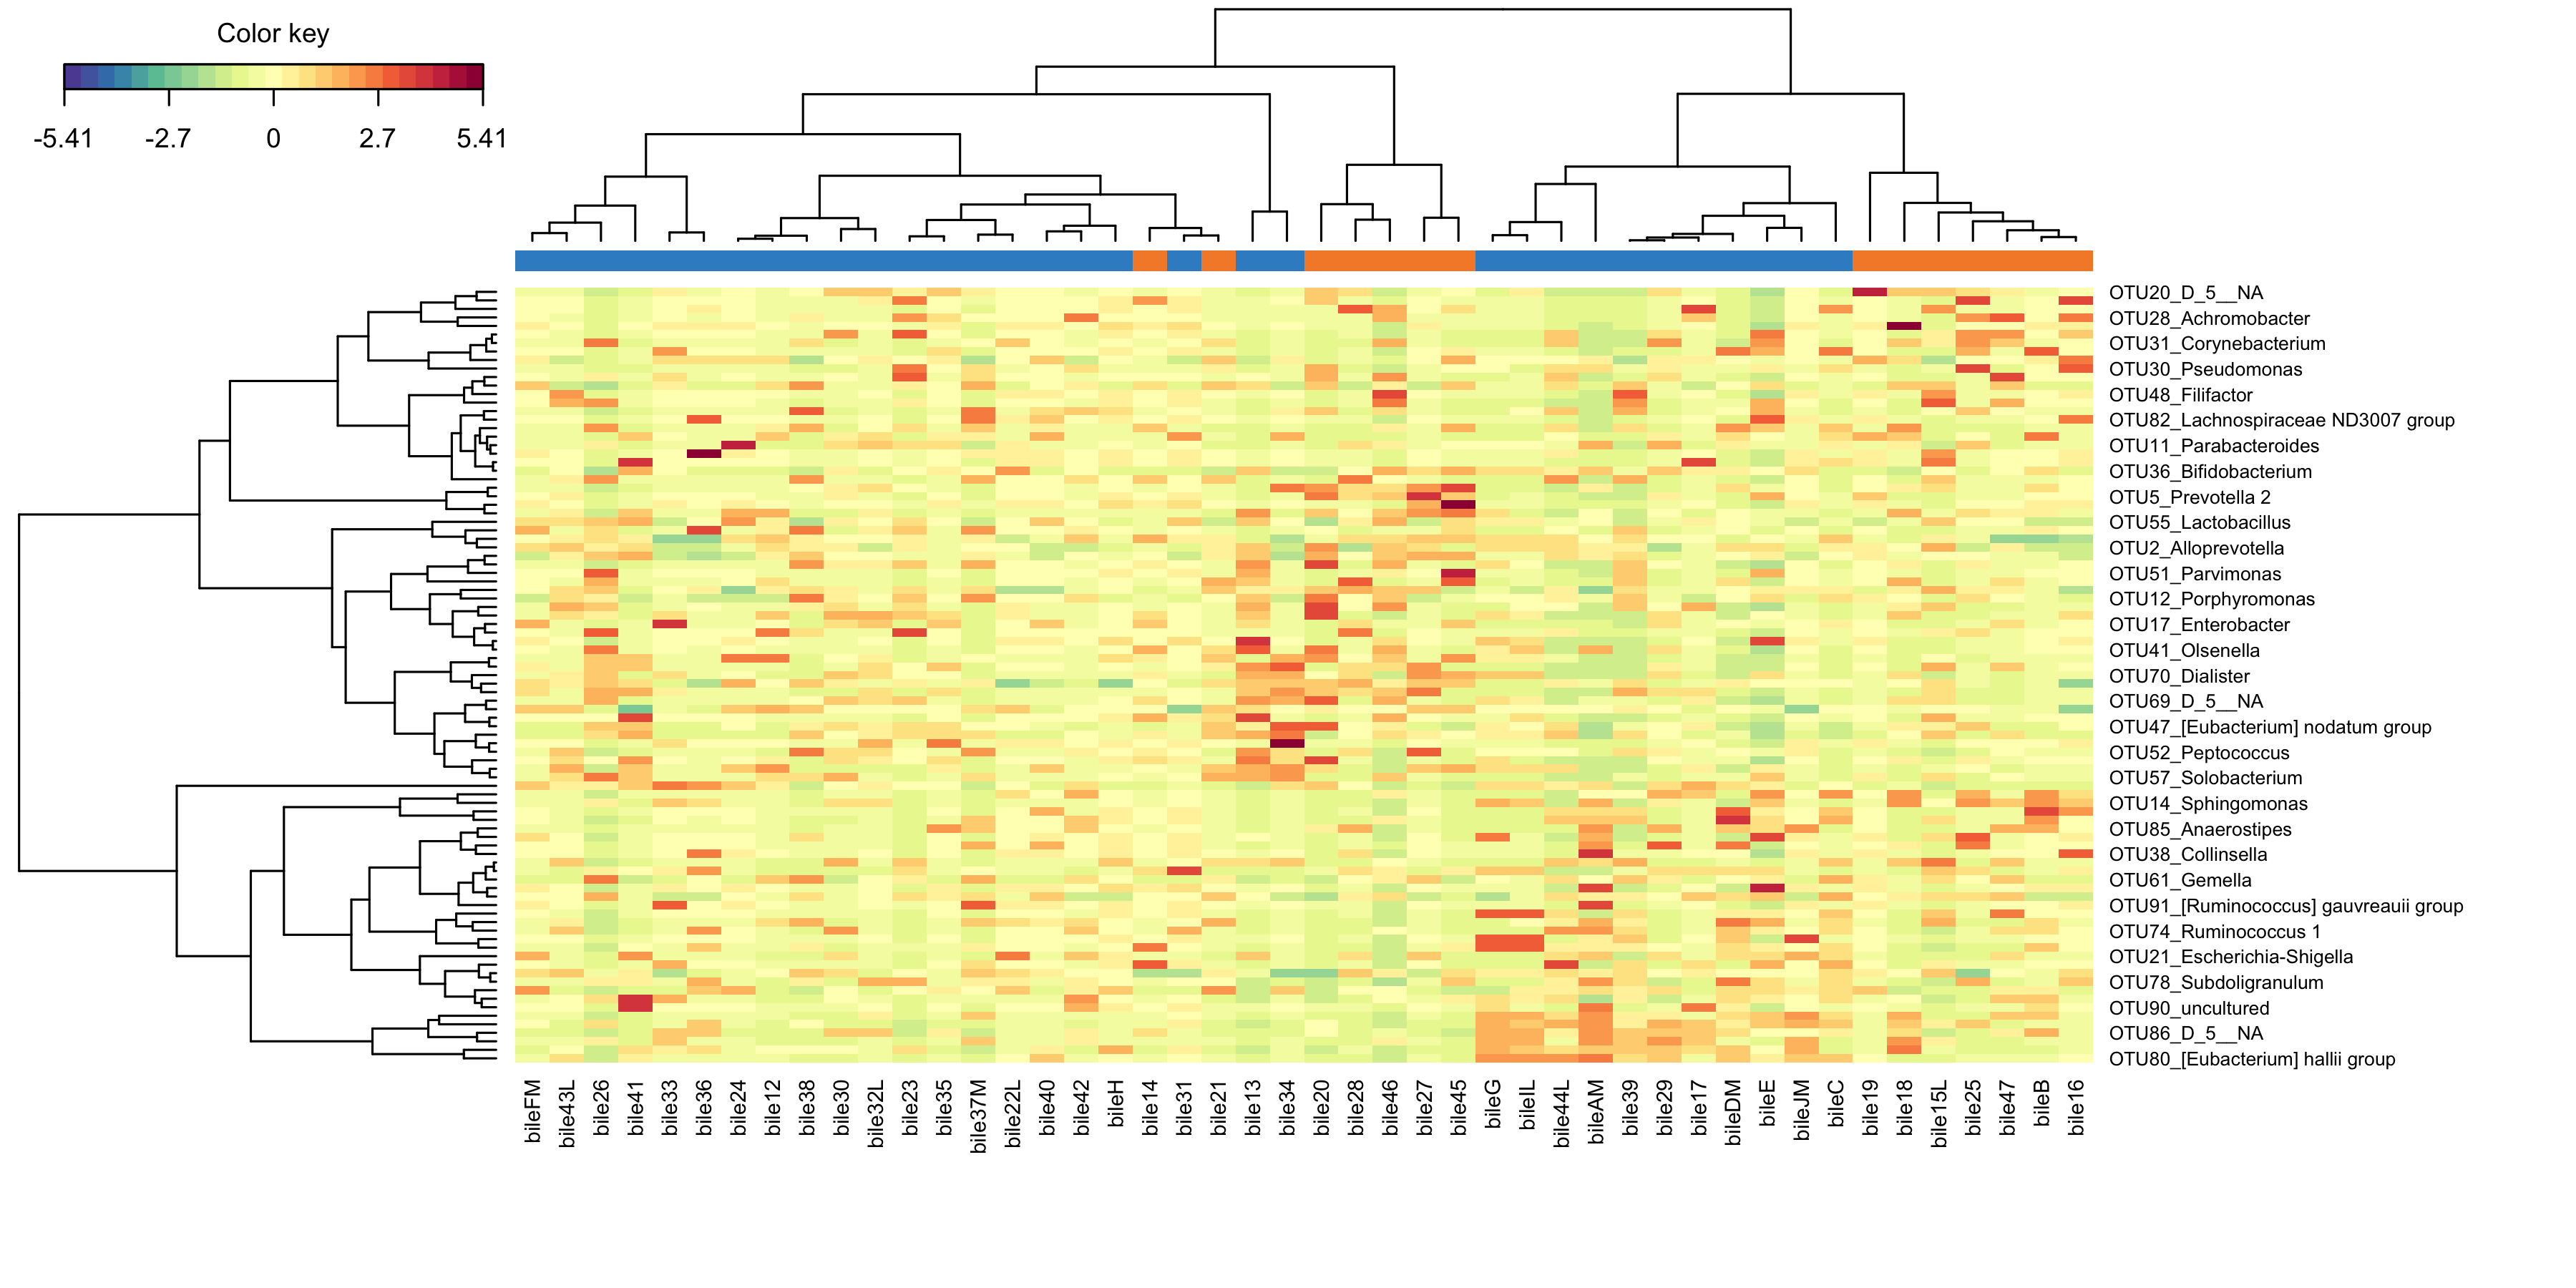

In [54]:
options(repr.plot.width = 12, repr.plot.height =6 ,repr.plot.res = 300)
cim(data.splsda, row.sideColors = color.mixo(Y), transpose = T, cluster = "both", margins = c(7,15), )

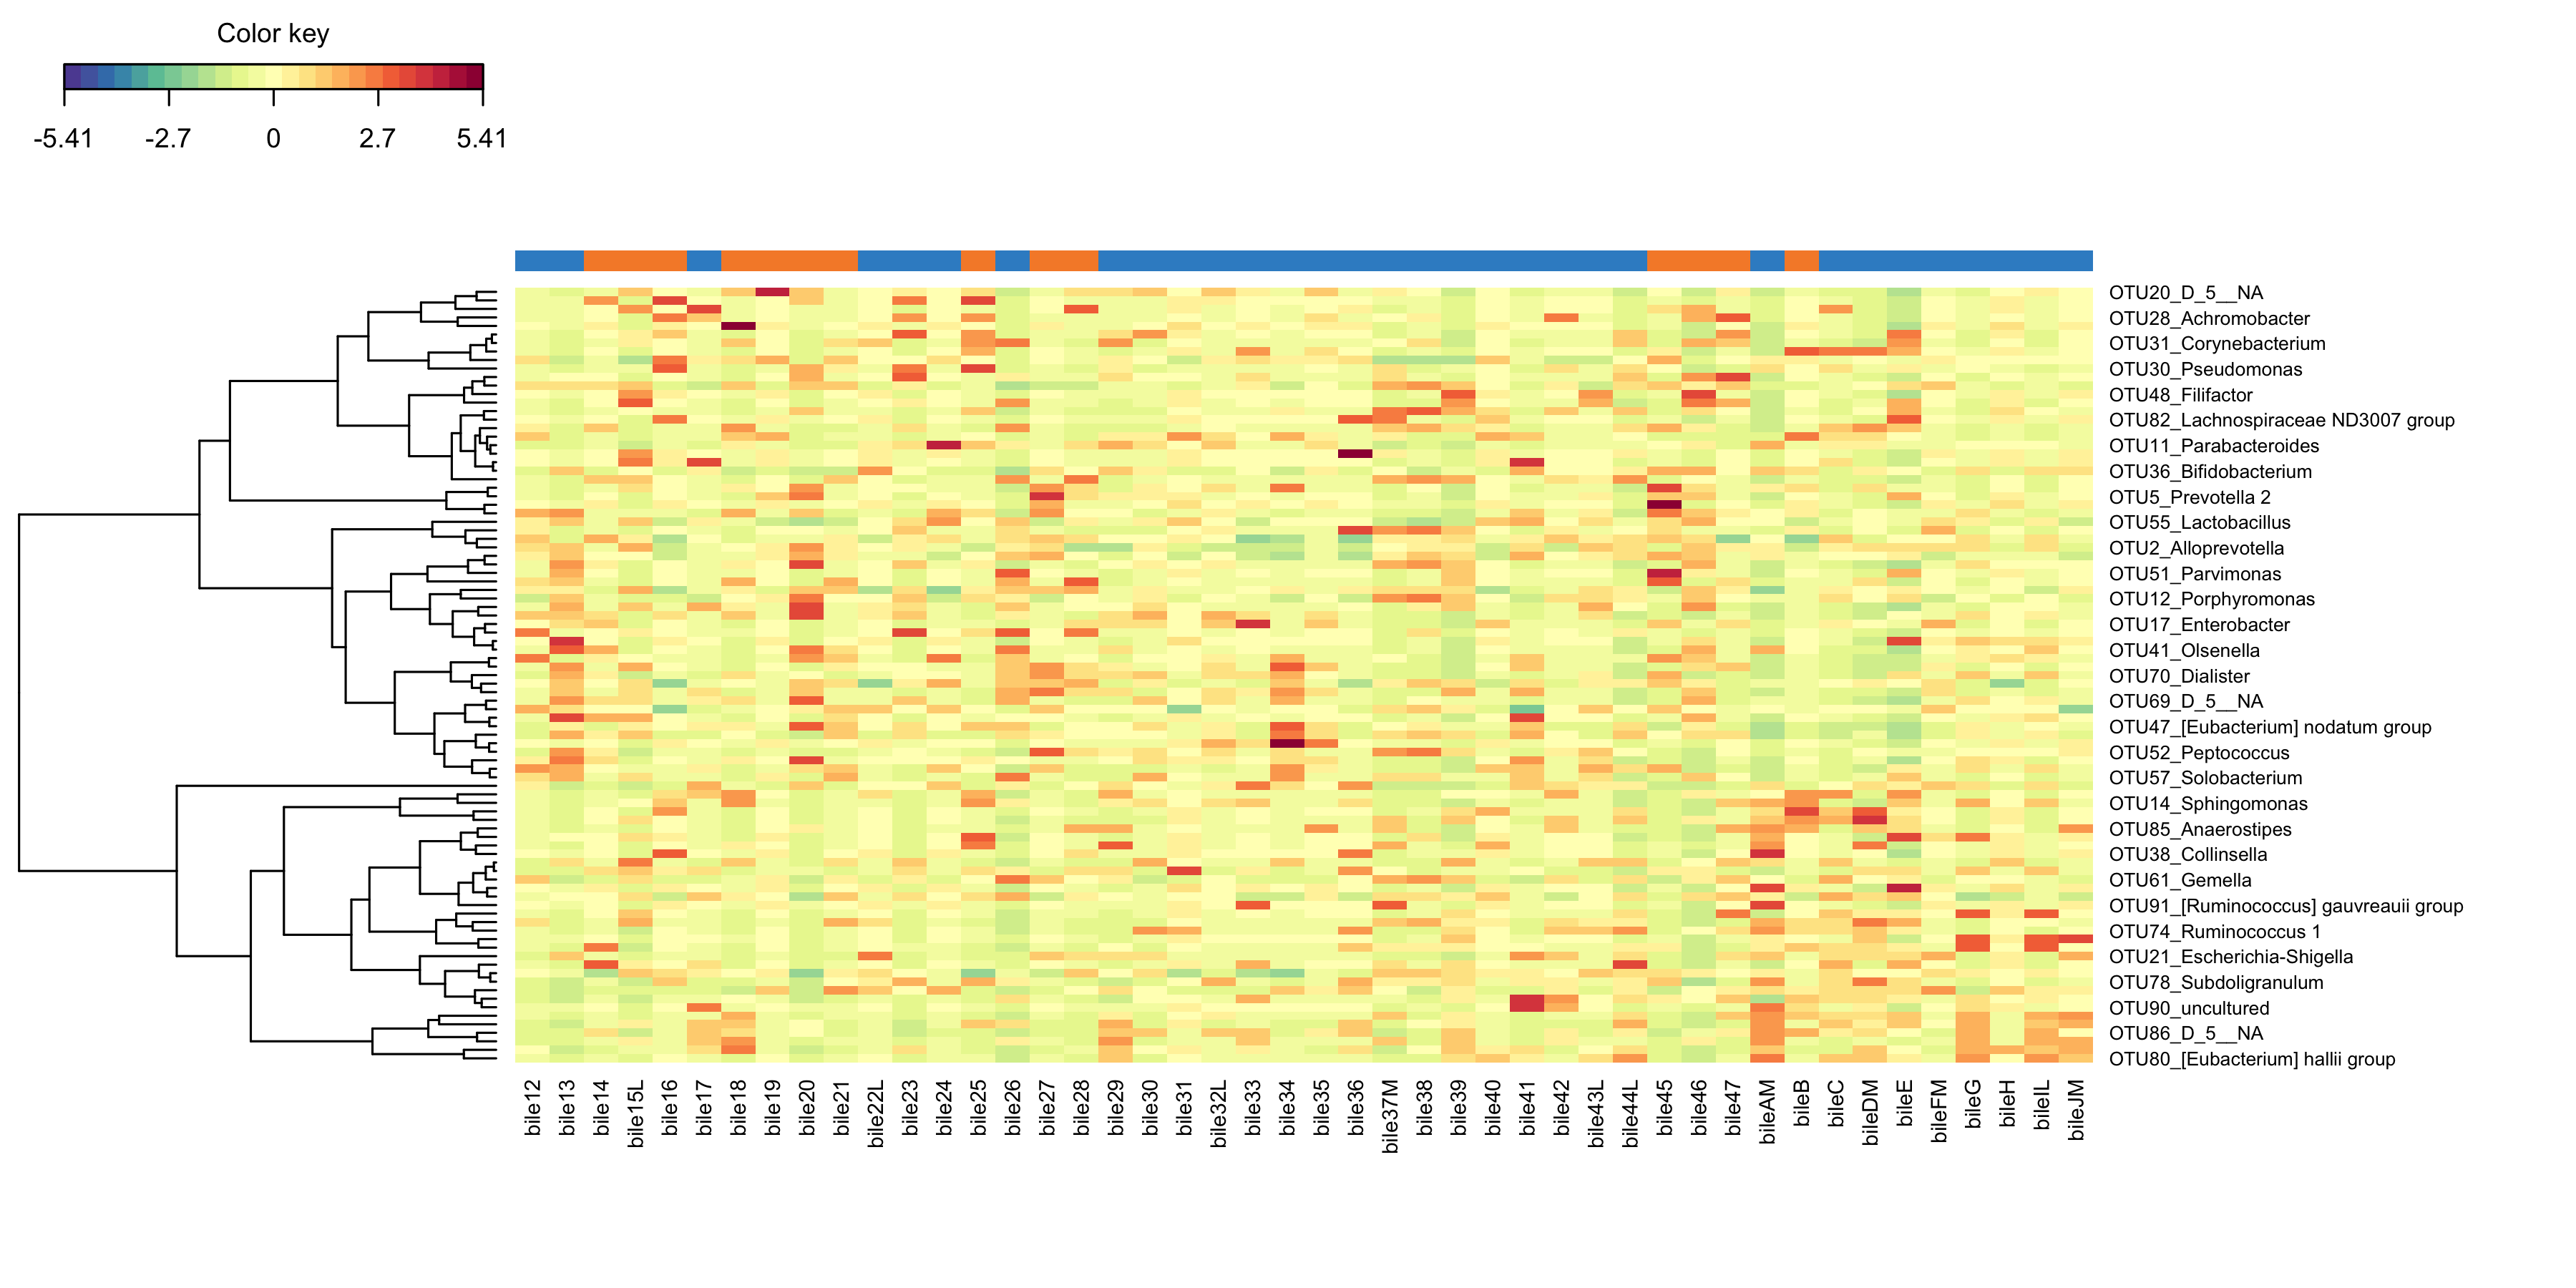

In [57]:
options(repr.plot.width = 12, repr.plot.height =6 ,repr.plot.res = 300)
cim(data.splsda, row.sideColors = color.mixo(Y), transpose = T, cluster = "column", margins = c(7,15))

In [58]:
library(ggpubr)
library(reshape2)

In [110]:
plot_abundance = function(data.TSS, Y, taxa_name){
    my_comp = c("Case","Control")
    taxa_name_short = sapply(strsplit(taxa_name, "_" , fixed = T),"[[", 2)
    tx = data.TSS %>% as.data.frame %>% dplyr::select(taxa_name)
    tx["group"] = Y
    options(repr.plot.width=4, repr.plot.height=5)
    p = tx %>% melt(id.vars = "group") %>%
        ggstripchart( jitter = 0.05, x = "group", y = "value",color="group",  palette = c("black", "red"),  add = c( "boxplot"), ylab = taxa_name_short ) +
        xlab("") +
        rotate_x_text(45) + theme(legend.position = "none") + 
        yscale("log2", .format = TRUE) + 
        stat_compare_means(label.y = 0.03,method = "kruskal.test")
    return(p)
}

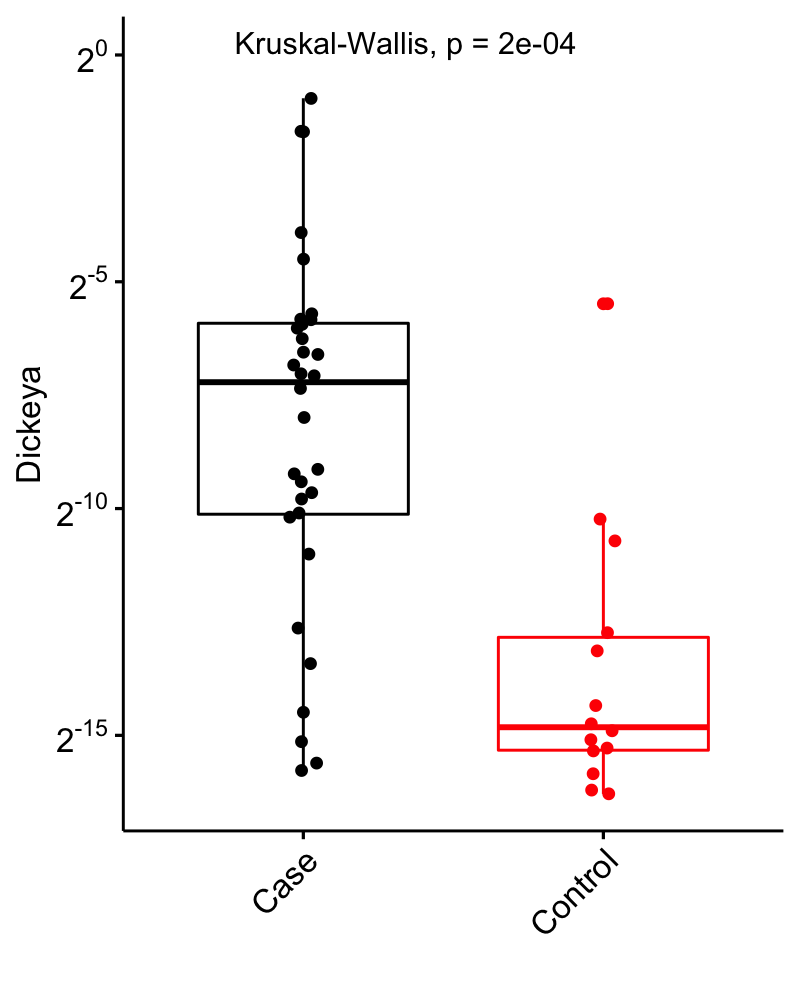

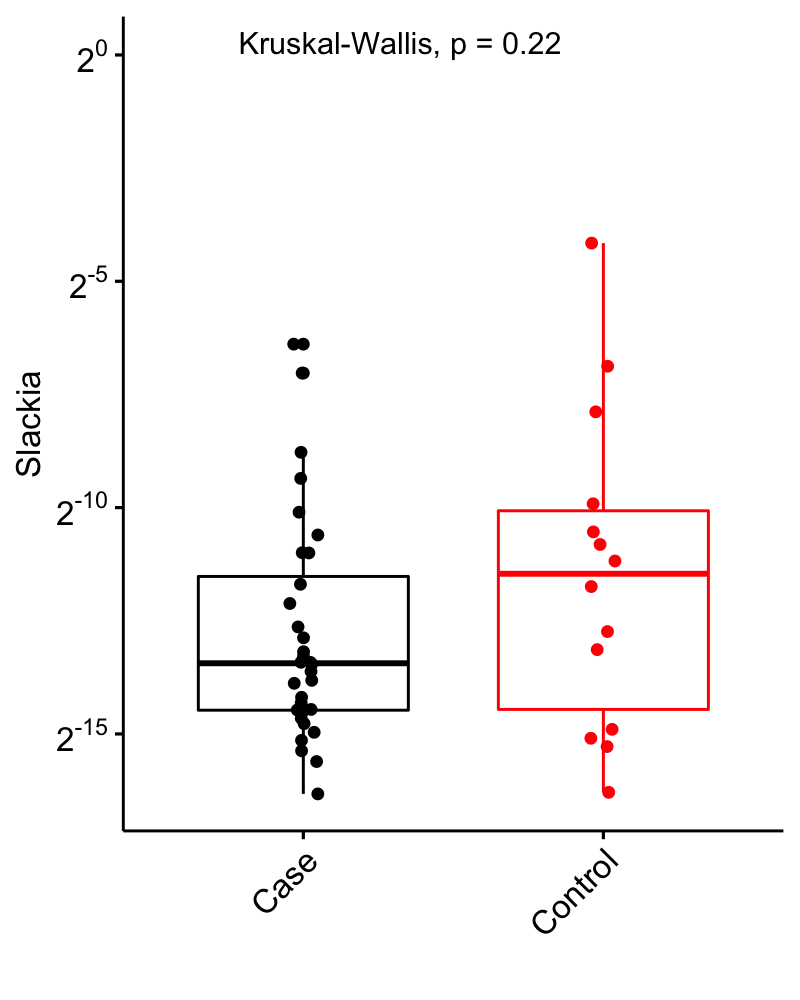

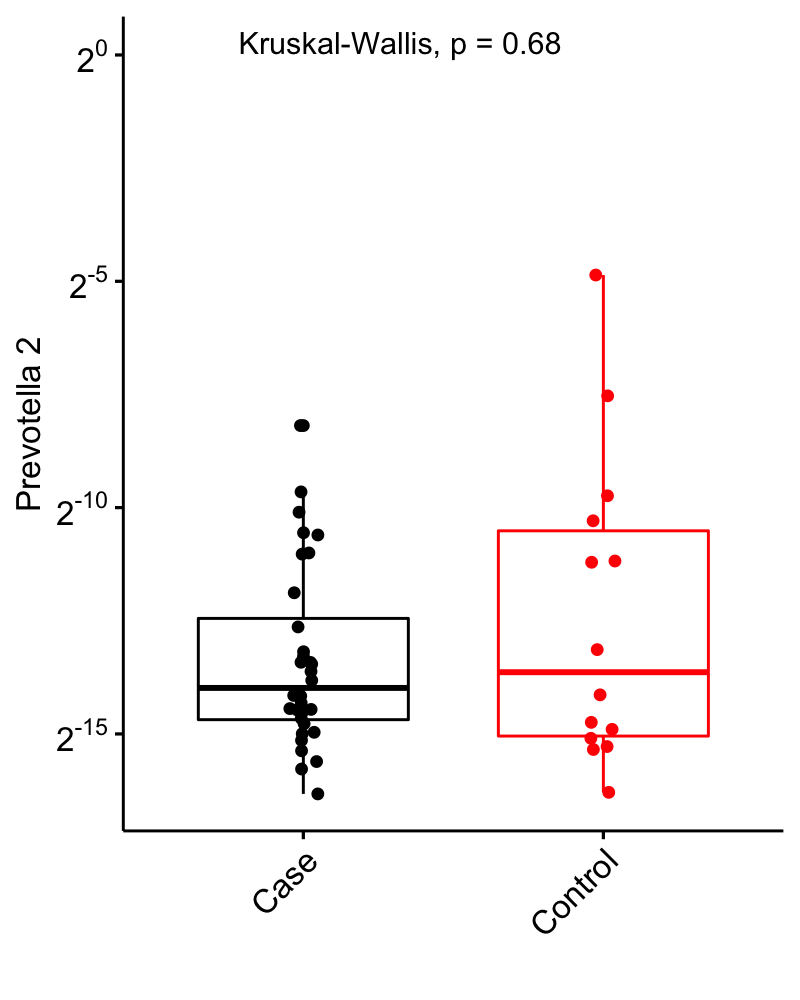

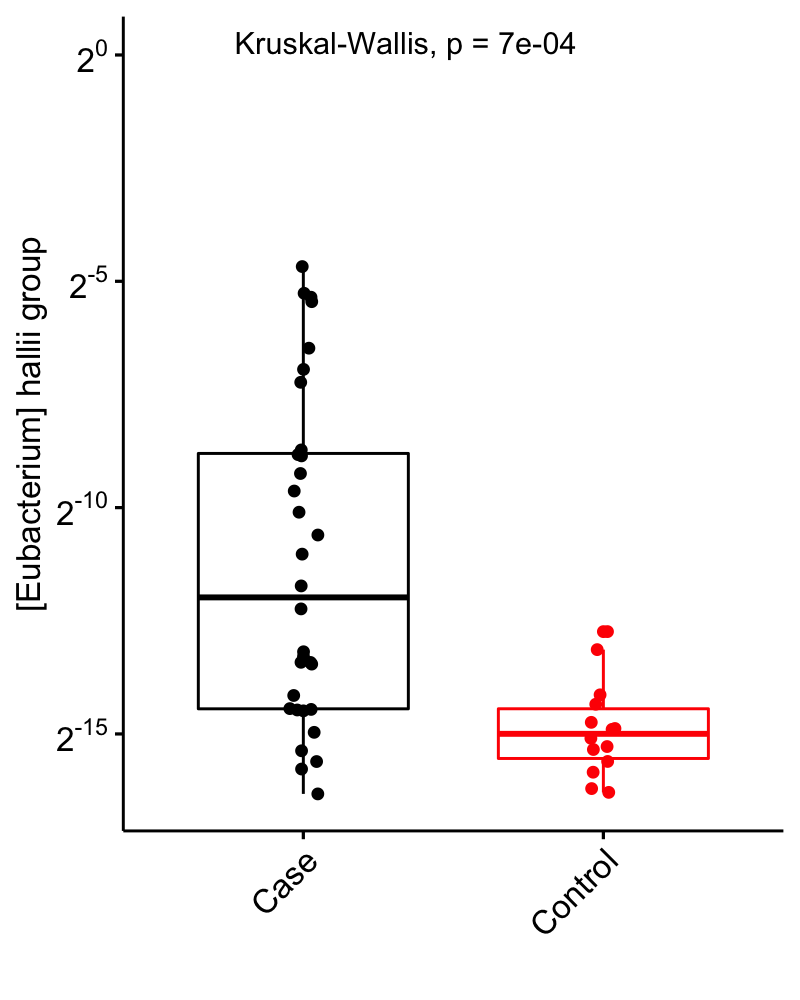

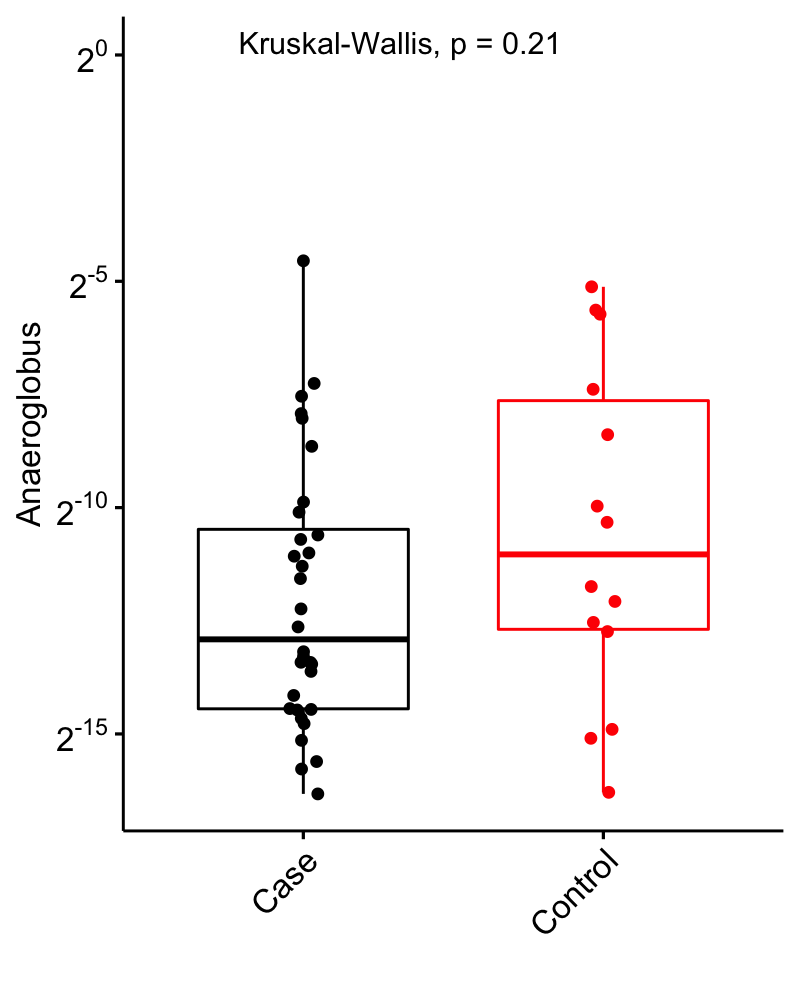

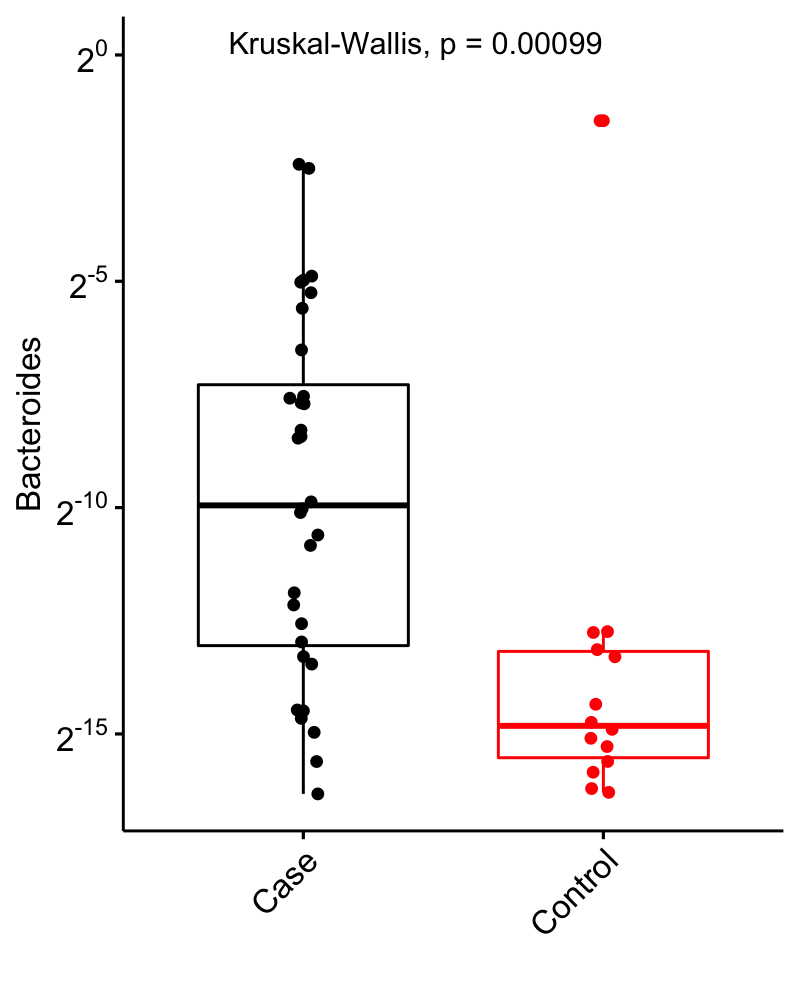

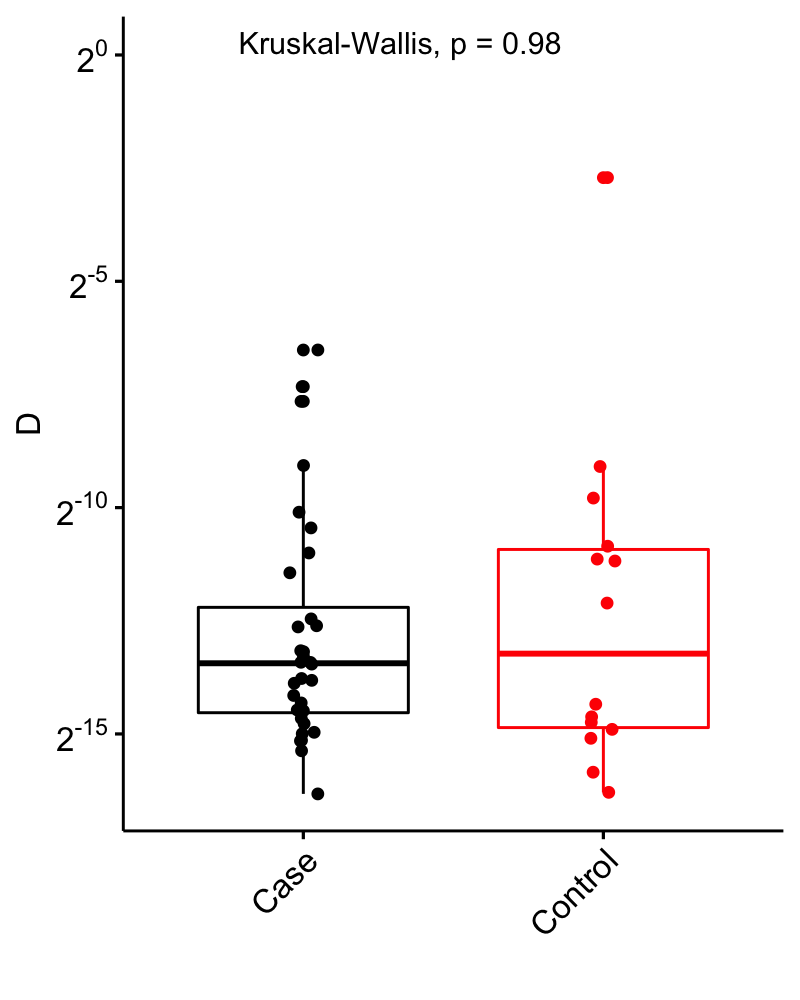

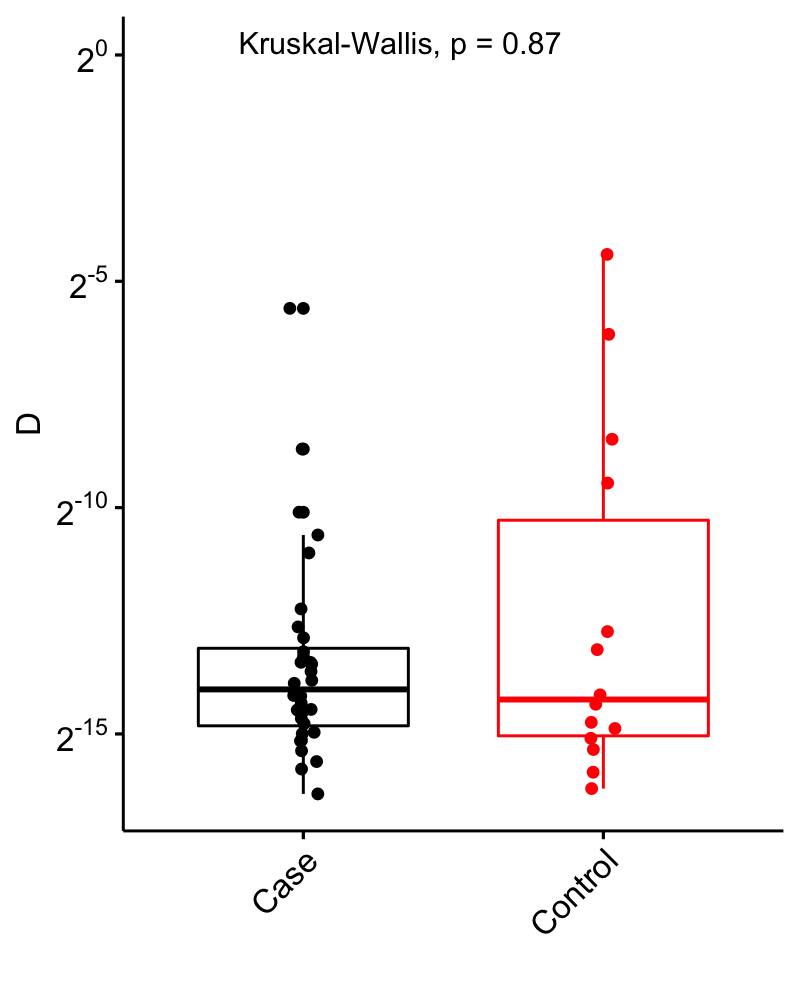

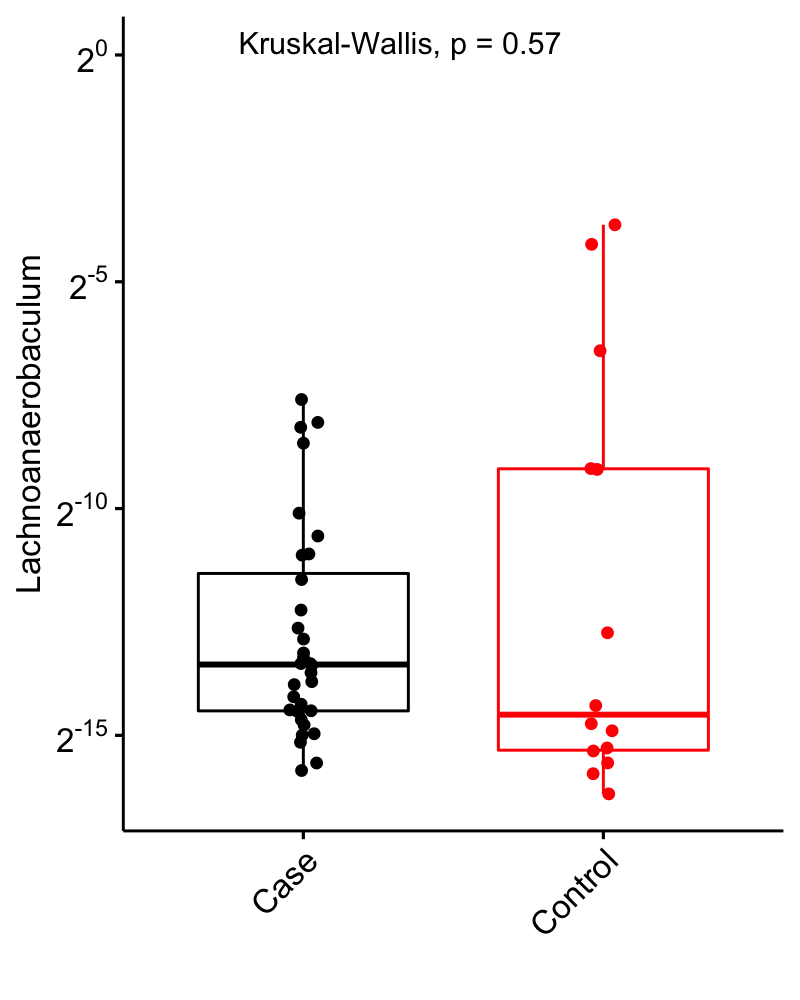

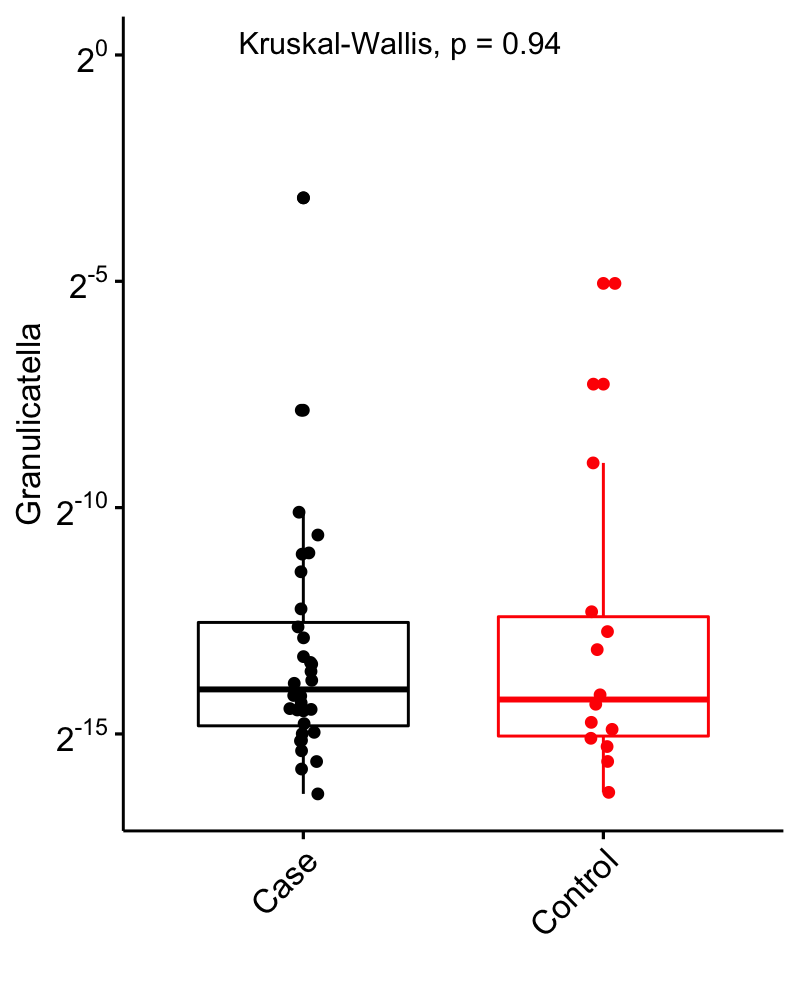

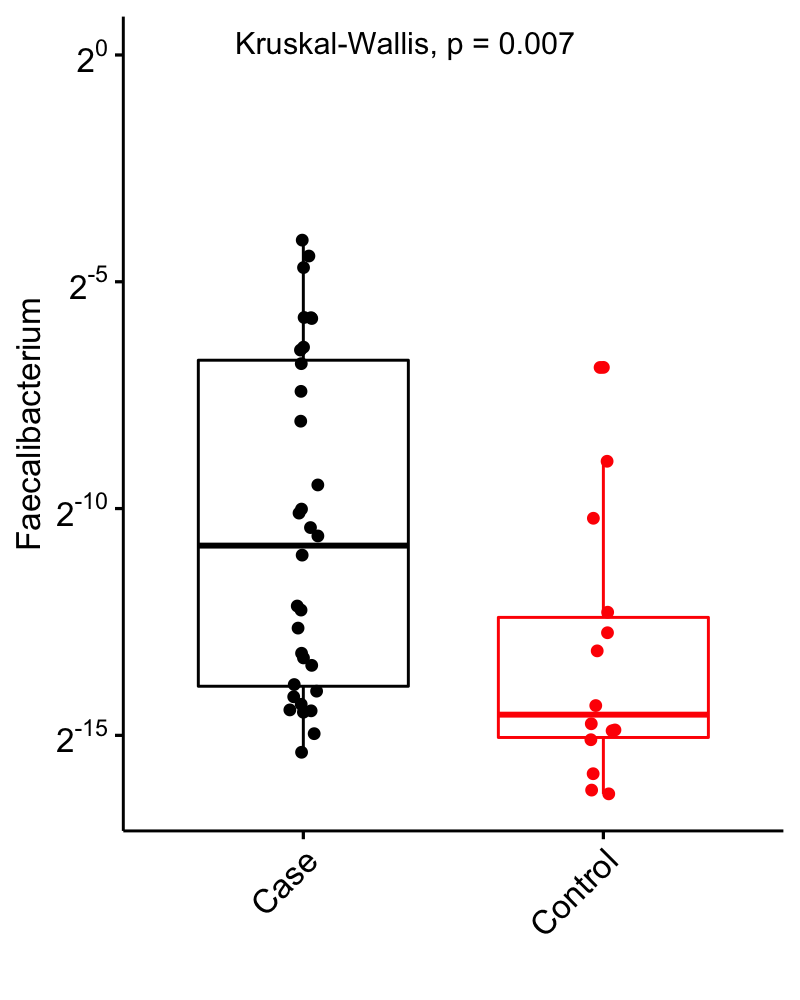

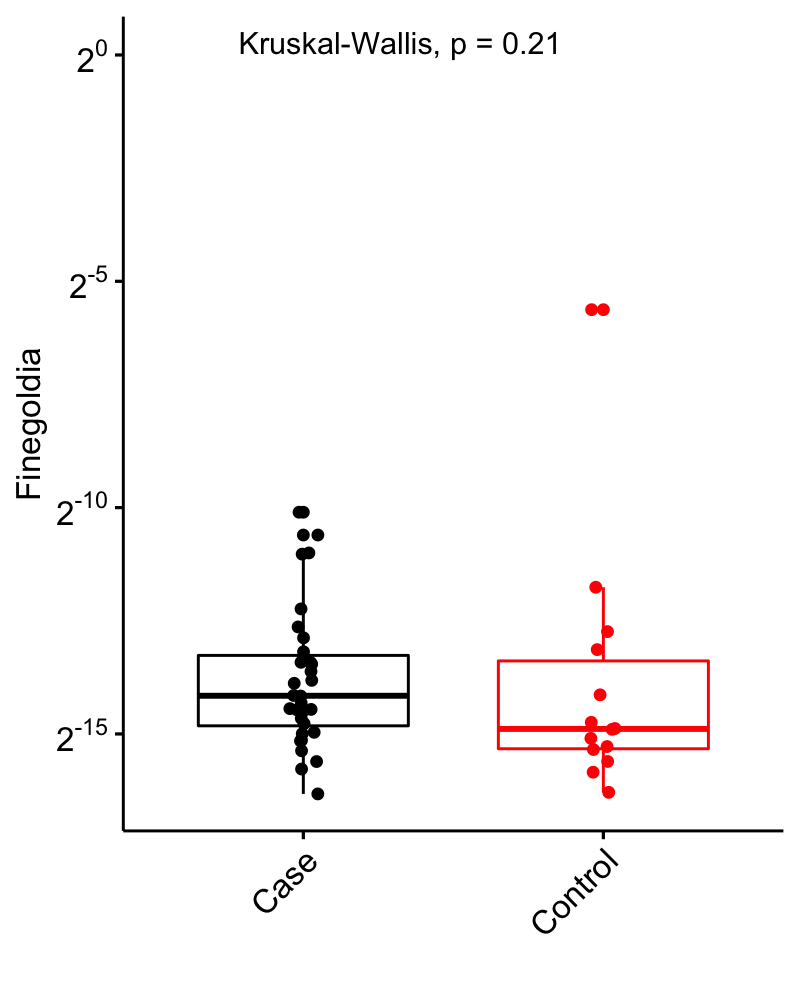

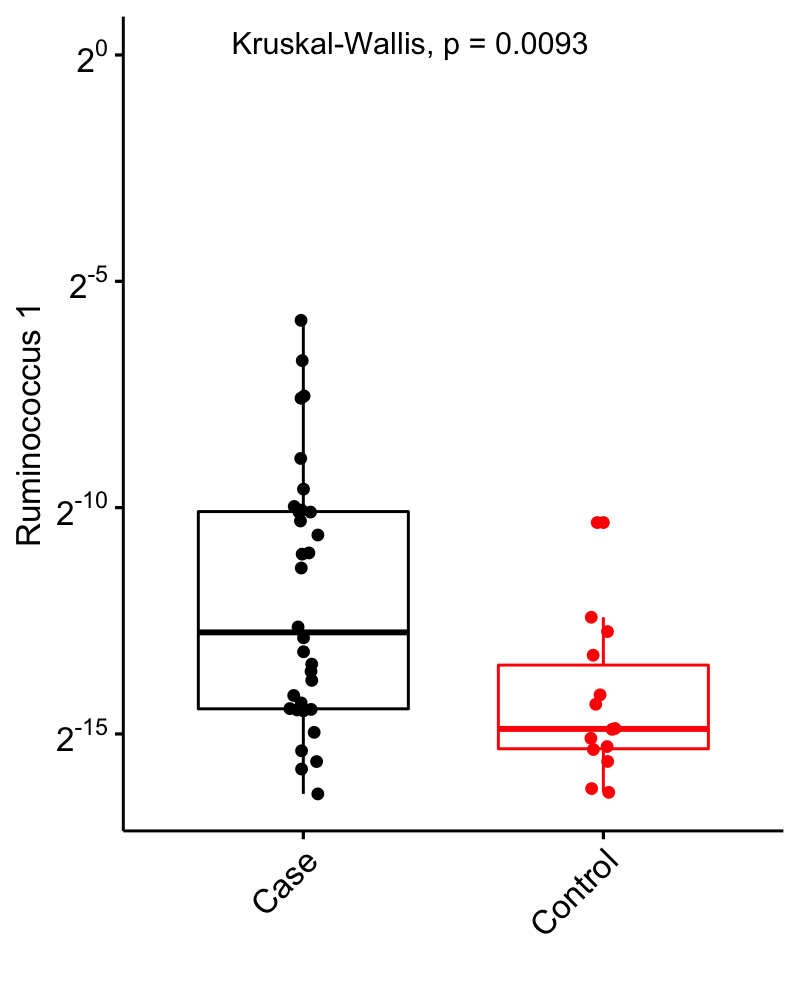

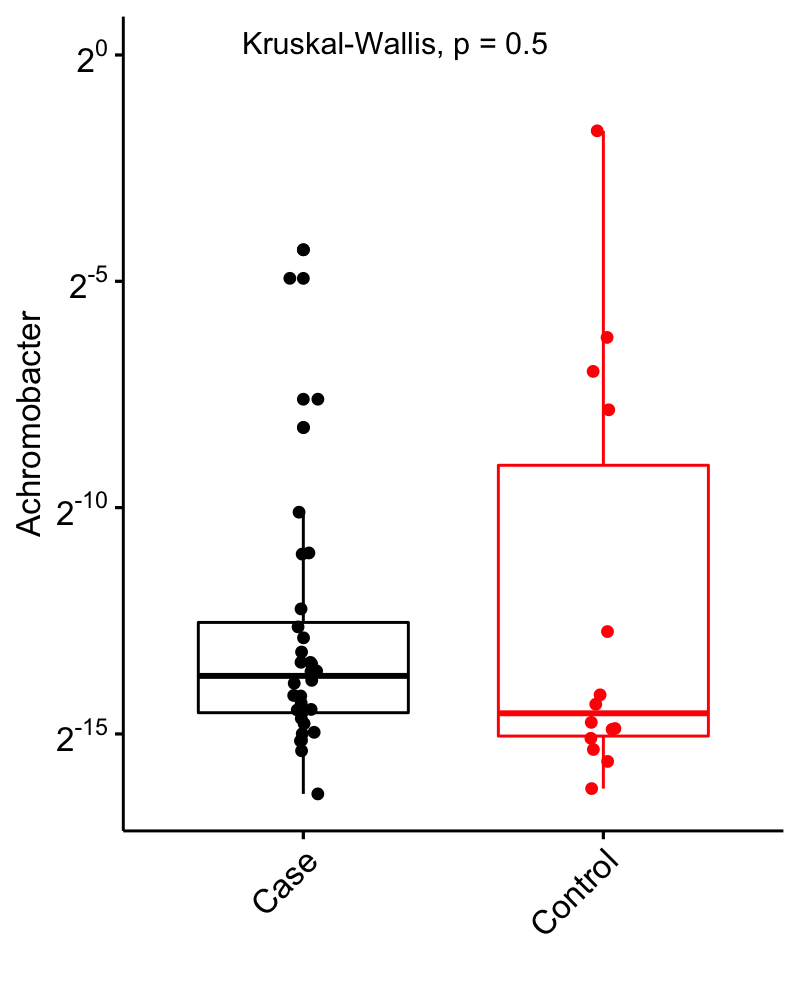

OTU19_Dickeya                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
data        1.000000e+00, 1.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 1.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 2.000000e+00, 1.000000e+00, 2.000000e+00, 2.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 1.000000e+00, 2.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,

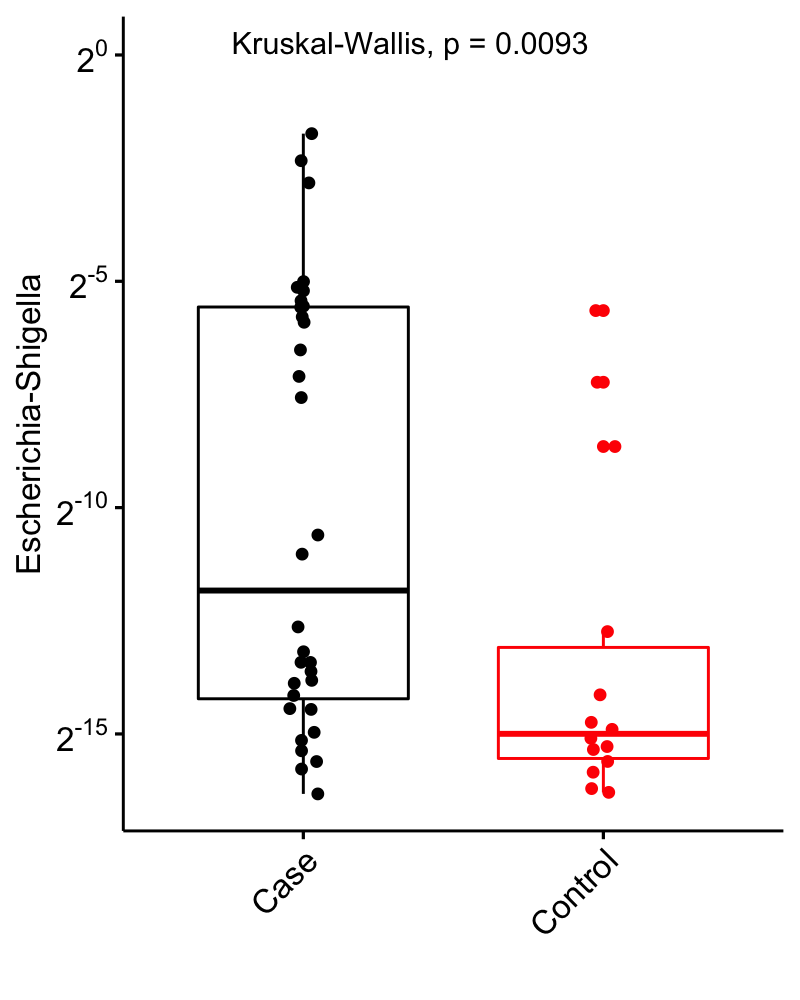

In [111]:
sapply( rownames(selectVar(data.splsda, comp = 1)$value), function(x){print( plot_abundance(data.TSS, Y, x)) } )

In [112]:
pdf("boxplots_KW_Cancer_vs_nonCancer_01.pdf", onefile = T)
sapply( rownames(selectVar(data.splsda, comp = 1)$value), function(x){print( plot_abundance(data.TSS, Y, x)) } )
dev.off()

OTU19_Dickeya                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
data        1.000000e+00, 1.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 1.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 2.000000e+00, 1.000000e+00, 2.000000e+00, 2.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 2.000000e+00, 2.000000e+00, 2.000000e+00, 1.000000e+00, 2.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,

pdf 
  2